In [1]:
# Importar librerías necesarias
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

seed_lauti = np.random.seed(31102001)

# Superficial Neural Network - Ejemplo

In [2]:
# Definir la función objetivo
def funcion_objetivo(x):
    return np.sin(x) + 0.3 * np.cos(3 * x)

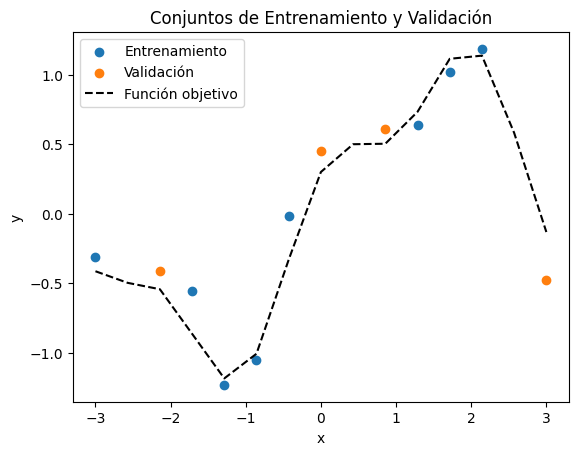

In [2]:
# Generar datos sintéticos con ruido
seed=np.random.seed(42)
x_datos = np.linspace(-3, 3, 15)
y_datos = funcion_objetivo(x_datos) + np.random.normal(scale=0.2, size=x_datos.shape)

# División en conjuntos de entrenamiento (80%) y testeo (20%)
x_train_all, x_test, y_train_all, y_test = train_test_split(x_datos, y_datos, test_size=0.2, random_state=seed)

# División en conjuntos de entrenamiento (70%) y validación (30%)
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, test_size=0.3, random_state=seed)

# Conversión a tensores
x_train_t = torch.tensor(x_train, dtype=torch.float32).unsqueeze(1)
y_train_t = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
x_val_t = torch.tensor(x_val, dtype=torch.float32).unsqueeze(1)
y_val_t = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)

# Graficar los conjuntos generados
plt.scatter(x_train, y_train, label='Entrenamiento')
plt.scatter(x_val, y_val, label='Validación')
plt.plot(x_datos, funcion_objetivo(x_datos), 'k--', label='Función objetivo')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Conjuntos de Entrenamiento y Validación')
plt.legend()
plt.show()


In [3]:
# Definir red neuronal superficial con activación ReLU
class RedSuperficial(nn.Module):
    def __init__(self, n_neuronas):
        super().__init__()
        self.modelo = nn.Sequential(
            nn.Linear(1, n_neuronas), # Primera capa lineal que viene del imput
            nn.ReLU(), # Primera capa no lineal de ReLU
            nn.Linear(n_neuronas, 1) # Nos lleva a un unico input
        )

    def forward(self, x):
        return self.modelo(x)


In [4]:
# Función de entrenamiento con visualización en tiempo real de la pérdida
def entrenar_y_graficar(modelo, x_train, y_train, x_val, y_val, epocas=2000, learning_rate=1e-2):
    optimizador = torch.optim.Adam(modelo.parameters(), lr=learning_rate) # El optimizdor es como lo que vimos como el 
                                                                          # stochastic gradient descent (pero otro)
    
    criterio = nn.MSELoss()

    perdida_train, perdida_val = [], []

    plt.ion()
    fig, ax = plt.subplots(figsize=(10, 5))

    for epoca in range(epocas):
        modelo.train()
        pred_train = modelo(x_train)
        loss_train = criterio(pred_train, y_train)

        optimizador.zero_grad()
        loss_train.backward()
        optimizador.step()

        modelo.eval()
        with torch.no_grad():
            pred_val = modelo(x_val)
            loss_val = criterio(pred_val, y_val)

        perdida_train.append(loss_train.item())
        perdida_val.append(loss_val.item())

        if epoca == epocas - 1:
            ax.clear()
            ax.plot(perdida_train, label='Pérdida entrenamiento', color='blue')
            ax.plot(perdida_val, label='Pérdida validación', color='orange')
            ax.set_xlabel('Época')
            ax.set_ylabel('Pérdida (MSE)')
            ax.set_title(f'Entrenamiento en época {epocas}')
            ax.legend()
            ax.grid()
            ax.set_xscale('log')
            ax.set_yscale('log')
            plt.pause(0.01)

    plt.ioff()
    plt.show()

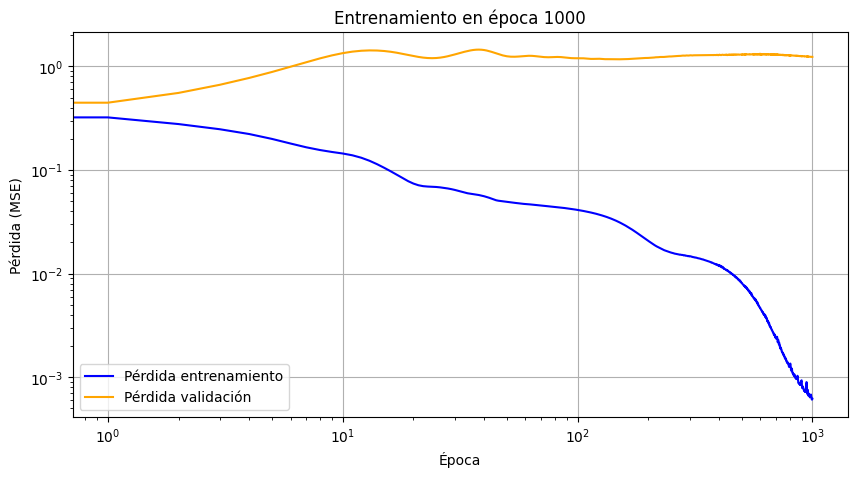

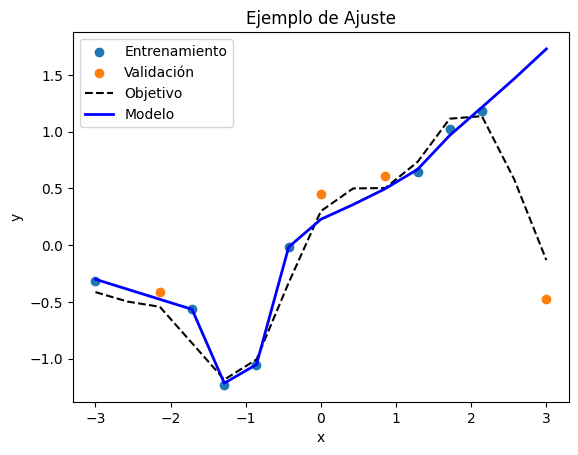

In [5]:
# Ejemplo de Ajuste
modelo = RedSuperficial(n_neuronas=20)
entrenar_y_graficar(modelo, x_train_t, y_train_t, x_val_t, y_val_t, epocas=1000)

# GRaficar ajuste final
modelo.eval()
with torch.no_grad():
    pred= modelo(torch.tensor(x_datos, dtype=torch.float32).unsqueeze(1)).numpy()

plt.scatter(x_train, y_train, label='Entrenamiento')
plt.scatter(x_val, y_val, label='Validación')
plt.plot(x_datos, funcion_objetivo(x_datos), 'k--', label='Objetivo')
plt.plot(x_datos, pred, 'b', linewidth=2, label='Modelo')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ejemplo de Ajuste')
plt.legend()
plt.show()


# 📝 Ejercicios

Realizar los siguientes experimentos utilizando la función `entrenar_y_graficar()` proporcionada:

1. **Análisis del Subajuste**:  
   - Utilizar una cantidad muy reducida de neuronas (entre 1 y 5).  
   - Graficar y describir los resultados obtenidos.

2. **Análisis del Sobreajuste**:  
   - Incrementar considerablemente la cantidad de neuronas (por ejemplo, 1000).  
   - Observar la curva de validación y señalar en qué momento comienza el sobreajuste.

3. **Optimización del modelo**:  
   - Encontrar un modelo intermedio que evite tanto subajuste como sobreajuste. (pista: pensar en el rol numero de datos).
   - Documentar la elección del número óptimo de neuronas y de datos en función de las curvas de entrenamiento y validación.


---

Aumento considerablemnete la cantidad de datos (a 50 desde 15) para que el entrenamiento de la red no dependa tanto de como es la division de los datos entre testeo, validacion y entrenamiento. Mi idea va a ser mantener siempre la cantidad de epocas y la cantidad de datos siempre igual para lo que queda de los ejercicios

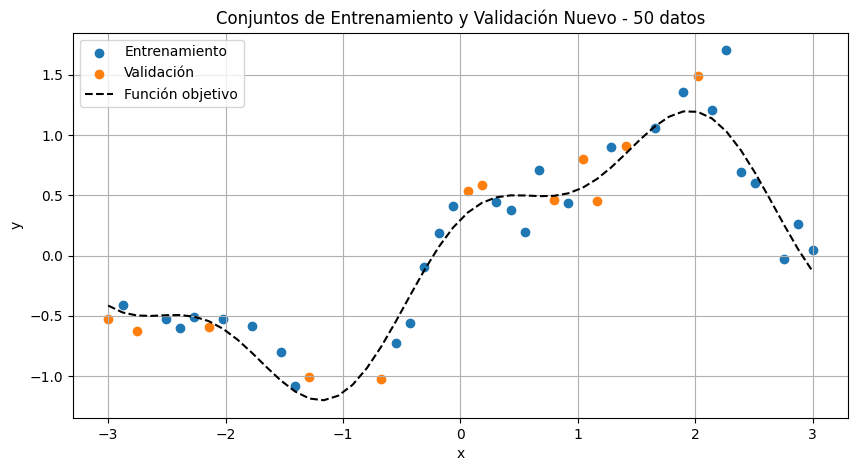

In [6]:
# Generar datos sintéticos con ruido
x_datos_lauti = np.linspace(-3, 3, 50)
y_datos_lauti = funcion_objetivo(x_datos_lauti) + np.random.normal(scale=0.2, size=x_datos_lauti.shape)

# División en conjuntos de entrenamiento (80%) y testeo (20%)
x_train_all_lauti, x_test_lauti, y_train_all_lauti, y_test_lauti = train_test_split(x_datos_lauti, y_datos_lauti, test_size=0.2, random_state=seed_lauti)

# División en conjuntos de entrenamiento (70%) y validación (30%)
x_train_lauti, x_val_lauti, y_train_lauti, y_val_lauti = train_test_split(x_train_all_lauti, y_train_all_lauti, test_size=0.3, random_state=seed_lauti)

# Conversión a tensores
x_train_t_lauti = torch.tensor(x_train_lauti, dtype=torch.float32).unsqueeze(1)
y_train_t_lauti = torch.tensor(y_train_lauti, dtype=torch.float32).unsqueeze(1)
x_val_t_lauti = torch.tensor(x_val_lauti, dtype=torch.float32).unsqueeze(1)
y_val_t_lauti = torch.tensor(y_val_lauti, dtype=torch.float32).unsqueeze(1)

# Graficar los conjuntos generados
plt.figure(figsize=(10, 5))
plt.scatter(x_train_lauti, y_train_lauti, label='Entrenamiento')
plt.scatter(x_val_lauti, y_val_lauti, label='Validación')
plt.plot(x_datos_lauti, funcion_objetivo(x_datos_lauti), 'k--', label='Función objetivo')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Conjuntos de Entrenamiento y Validación Nuevo - 50 datos')
plt.grid()
plt.legend()
plt.show()

Con esto fijo, lo que voy a hacer ahora es analizar los distintos casos:

# Analisis de subajuste

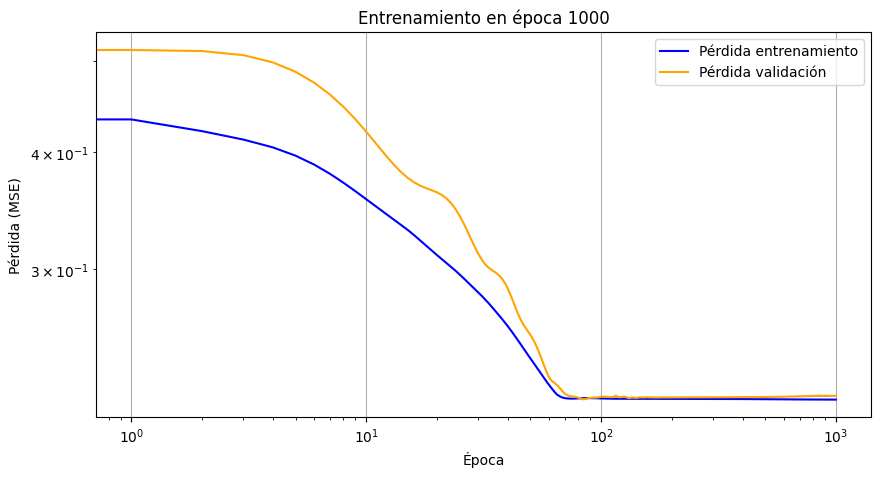

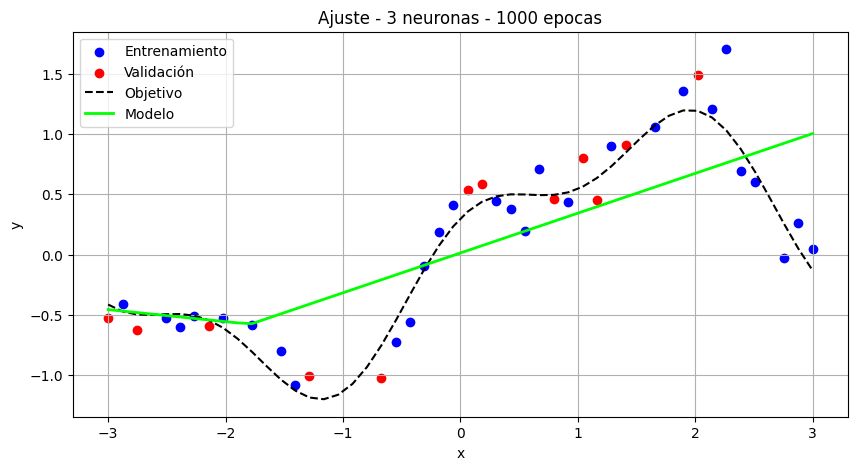

In [7]:
# Sub-Ajuste
modelo_lauti_subajuste = RedSuperficial(n_neuronas=3) # Hago mi red con solo 3 neuronas
entrenar_y_graficar(modelo_lauti_subajuste, x_train_t_lauti, y_train_t_lauti, x_val_t_lauti, y_val_t_lauti, epocas=1000)

# Graficar ajuste final
modelo_lauti_subajuste.eval()
with torch.no_grad():
    pred_lauti_subajuste = modelo_lauti_subajuste(torch.tensor(x_datos_lauti, dtype=torch.float32).unsqueeze(1)).numpy()

plt.figure(figsize=(10, 5))
plt.scatter(x_train_lauti, y_train_lauti, label='Entrenamiento', color = 'b')
plt.scatter(x_val_lauti, y_val_lauti, label='Validación', color = 'r')
plt.plot(x_datos_lauti, funcion_objetivo(x_datos_lauti), 'k--', label='Objetivo')
plt.plot(x_datos_lauti, pred_lauti_subajuste, 'lime', linewidth=2, label='Modelo')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste - 3 neuronas - 1000 epocas')
plt.grid()
plt.legend()
plt.show()


Se puede ver claramente que el modelo que se armo la red es malo, cuando vemos como es el ajuste con repecto a tantos los puntos como con la funcion que tenemos como objetivo que aprenda a fitear. Indica subajuste.

Por otro lado, observando como se comportan las loss-function, a lo largo de las epocas, vemos que hay un problema en la epoca ~80 donde la loss-function de la validacion compienza a aumentar y sobrepasa a la loss-function del set de entrenamiento, indicando un posible sobreajuste, o dicho de otra manera, que la red empezo a aprenderse a de memoria los puntos, a costa de perder nocion general de la funcion a ajustar (cosa que se puede ver viendo la loss del set de validacion). Lo importante es entender que esta red es incapaz de ser expresiva por la poca cantidad de neuronas.

---

# Analisis de sobreajuste

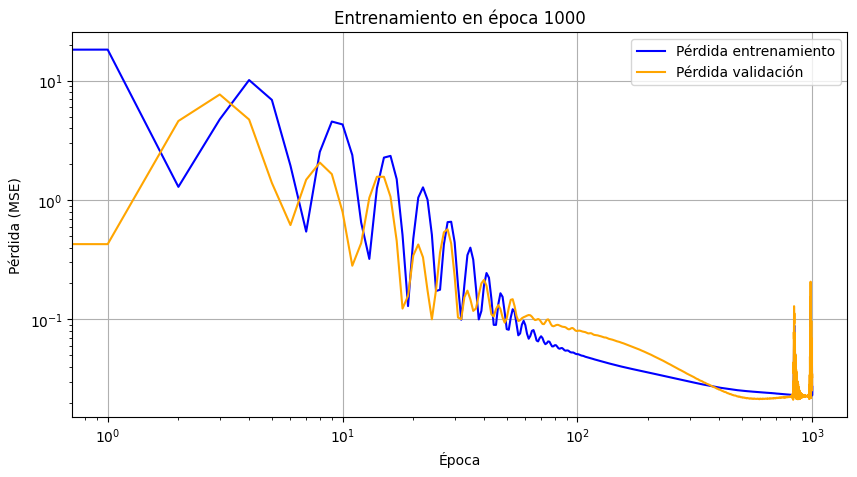

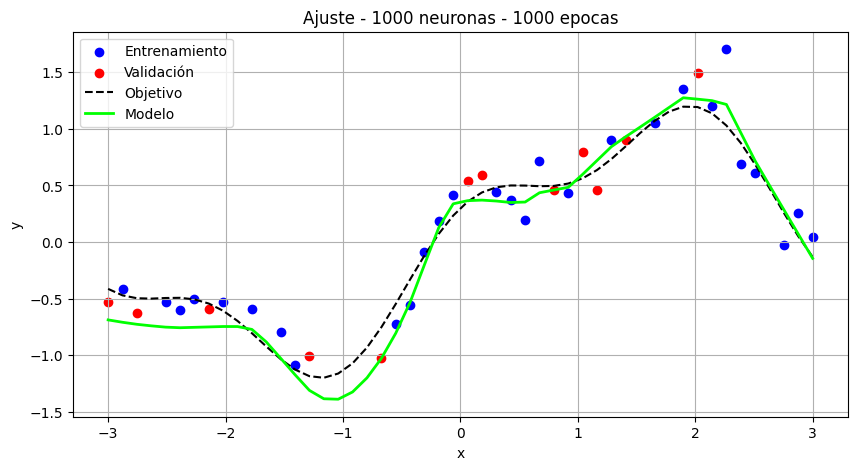

In [8]:
# Ejemplo de Ajuste
modelo_lauti_sobreajuste = RedSuperficial(n_neuronas=1000)
entrenar_y_graficar(modelo_lauti_sobreajuste, x_train_t_lauti, y_train_t_lauti, x_val_t_lauti, y_val_t_lauti, epocas=1000)

# GRaficar ajuste final
modelo_lauti_sobreajuste.eval()
with torch.no_grad():
    pred_lauti_sobreajuste = modelo_lauti_sobreajuste(torch.tensor(x_datos_lauti, dtype=torch.float32).unsqueeze(1)).numpy()


plt.figure(figsize=(10, 5))
plt.scatter(x_train_lauti, y_train_lauti, label='Entrenamiento', color = 'b')
plt.scatter(x_val_lauti, y_val_lauti, label='Validación', color = 'r')
plt.plot(x_datos_lauti, funcion_objetivo(x_datos_lauti), 'k--', label='Objetivo')
plt.plot(x_datos_lauti, pred_lauti_sobreajuste, 'lime', linewidth=2, label='Modelo')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste - 1000 neuronas - 1000 epocas')
plt.grid()
plt.legend()
plt.show()


Aca vemos indicios de sobreajuste, principalmente cuando vemos la forma en la que el modelo con los puntos, la curva pasa por, aproximadamente, sobre todos los puntos (sin embargo a ojo no es tan malo el ajuste). Pero si podemos afirmar que hay perdida de generalidad cuando comparamos con los datos de validacion (como el cluster que hay en la ultima panza para arriba de la funcion donde no modela bien la respuesta de la funcion). Sin embargo cuando vemos como es la forma de las loss-functions de los sets de datos de entrenamiento y validacion, vemos que a las aproximadamente ~40 epocas, deja de mejorar en gran medida la loss del set de validacion y empieza a haber una diferencia significativa, que empieza a aumentar cada vez mas y mas, respecto al set de datos de entrenamiento. Esto es un claro ejemplo de sobreajuste. Cabe aclarar que en este caso el numero de neuronas (1000) es mucho mayor al numero de datos (50).

Para ver si este problema se reproduce si tuviese la misma cantidad de neuroas pero distribuidas en dos capas, puedo hacer una red con una arquitectura de dos ReLU's, pero con 500 neuronas en cada capa. Veamos:

In [9]:
# Definir red neuronal superficial con activación ReLU de dos capas
class RedSuperficial_doble_capa(nn.Module):
    def __init__(self, n_neuronas):
        super().__init__()
        self.modelo = nn.Sequential(
            nn.Linear(1, n_neuronas), # Primera capa lineal que viene del imput
            nn.ReLU(), # Primera capa no lineal de ReLU
            nn.Linear(n_neuronas, n_neuronas),
            nn.ReLU(),
            nn.Linear(n_neuronas, 1) # Nos lleva a un unico input
        )

    def forward(self, x):
        return self.modelo(x)


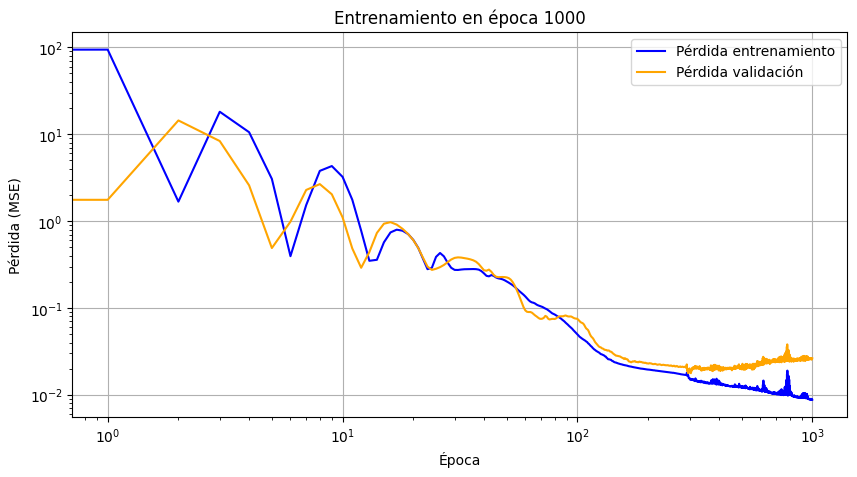

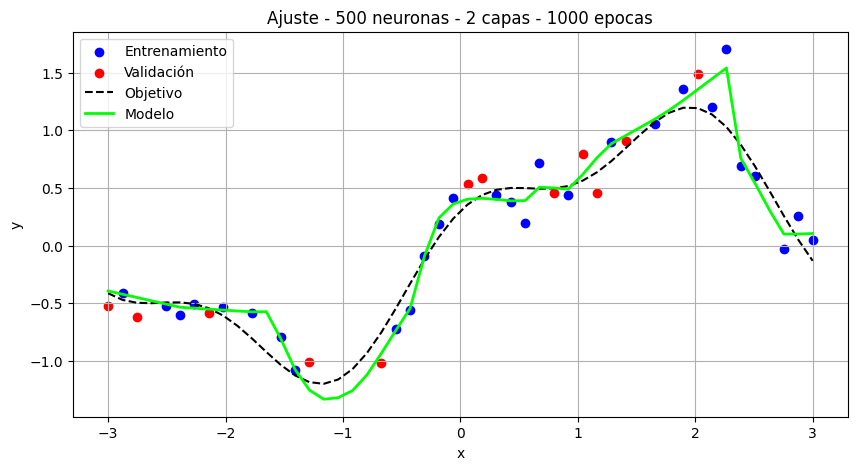

In [10]:
# Ejemplo de Ajuste
modelo_lauti_sobreajuste_doble_capa = RedSuperficial_doble_capa(n_neuronas=500)
entrenar_y_graficar(modelo_lauti_sobreajuste_doble_capa, x_train_t_lauti, y_train_t_lauti, x_val_t_lauti, y_val_t_lauti, epocas=1000)

# GRaficar ajuste final
modelo_lauti_sobreajuste_doble_capa.eval()
with torch.no_grad():
    pred_lauti_sobreajuste_doble_capa = modelo_lauti_sobreajuste_doble_capa(torch.tensor(x_datos_lauti, dtype=torch.float32).unsqueeze(1)).numpy()

plt.figure(figsize=(10, 5))
plt.scatter(x_train_lauti, y_train_lauti, label='Entrenamiento', color = 'b')
plt.scatter(x_val_lauti, y_val_lauti, label='Validación', color = 'r')
plt.plot(x_datos_lauti, funcion_objetivo(x_datos_lauti), 'k--', label='Objetivo')
plt.plot(x_datos_lauti, pred_lauti_sobreajuste_doble_capa, 'lime', linewidth=2, label='Modelo')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste - 500 neuronas - 2 capas - 1000 epocas')
plt.grid()
plt.legend()
plt.show()


Aca vemos una mejoria clara en el modelo sobre los puntos (si volvemos a ver al comportamiento en el cluster de validacion), dado que les empieza a pegar a casi todos los puntos de entrenamiento, que es lo que busca el modelo (minimizar la loss-function de los datos de entrenamiento). Ademas vemos que se mejora el tema de las epocas donde no hay un claro momento donde parezca que comienza a sobreajustar. Esto es una prueba de la profundidad como medio de regularización implícita (mayor capacidad, pero mejor organizada)

Una hipotesis que tengo ahora es si el problema no es necesariamente solo dependiente del numero de puntos y de neuronas, sino tambien si no estamos haciendo epocas de mas y sobreajustando el modelo por eso (dado que le limite de 1000 epocas esta hard-codeado y no es algo variable como por ejemplo dependiente de como va el gradiente paso a paso).

# Optimizacion del modelo

Tengo 3 lineas para analizar:

1. Ver que pasa si con numero de epocas fijo y numero de datos fijo, que sucede cuando voy aumentando el numero de neuronas. Para esto es relevante que el numero de datos sea lo suficientemente grande como para que sea estadisticamente significativo
2. Ver que pasa si con numero de epocas fijo y numero de neuronas fijo, que sucede cuando voy aumentando el numero de datos. Aca voy a querer analizar si empieza a haber un problema cuando el numero de datos se empieza a parecer al de neuronas
3. Ver que pasa si con numero de neuronas fijo y numero de datos fijo, que sucede cuando voy aumentando el numero de epocas. Esta es la utlima hipotesis, respecto a si el problema es que estoy cortando en una epoca muy avanzada y por ende siempre cayendo en el sobre-ajuste.

## Análisis de variacion de neuronas
Fijar el número de épocas en 1000 y el número de datos en 100. Entrenar y graficar el modelo con una sola capa variando el número de neuronas de 20 a 1000 (incrementando en 20, 100, 500, 1000). Analizar los resultados en términos de ajuste visual y curvas de pérdida.

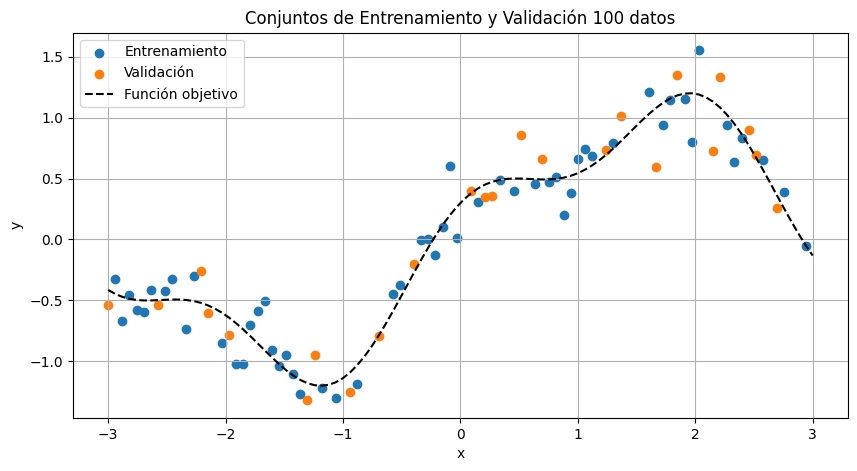

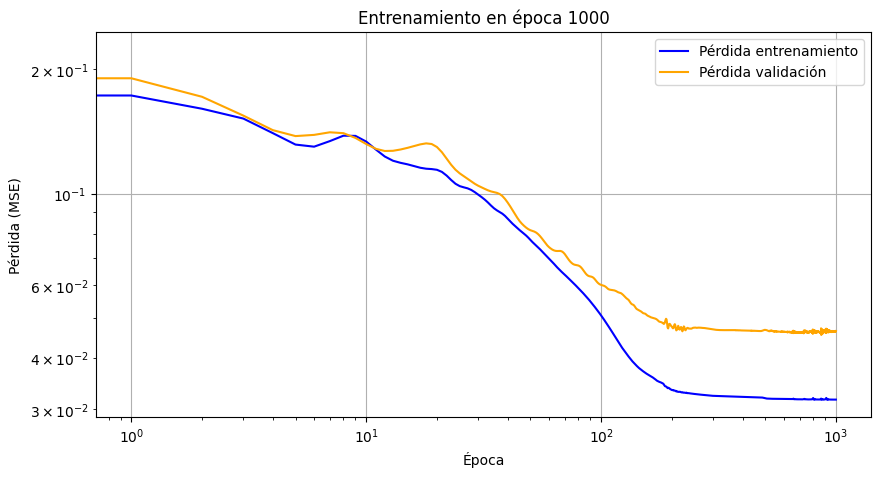

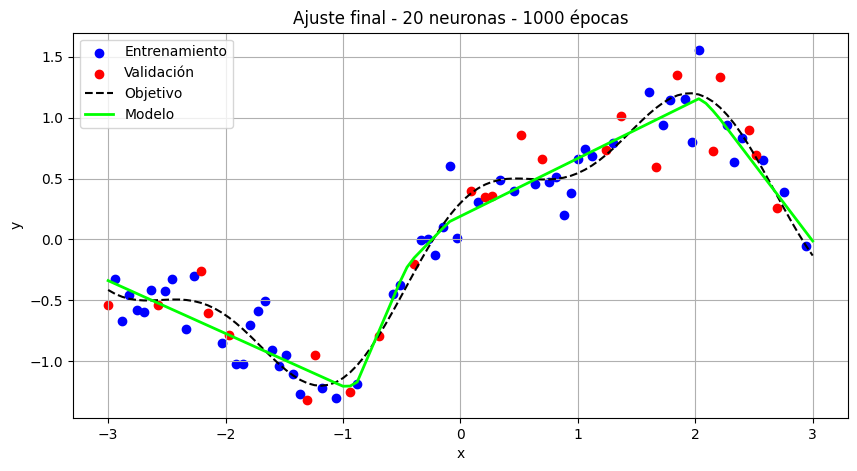

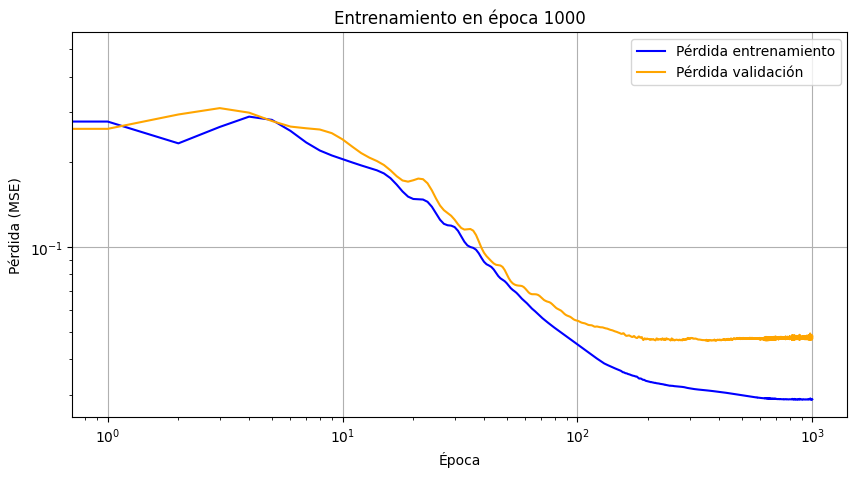

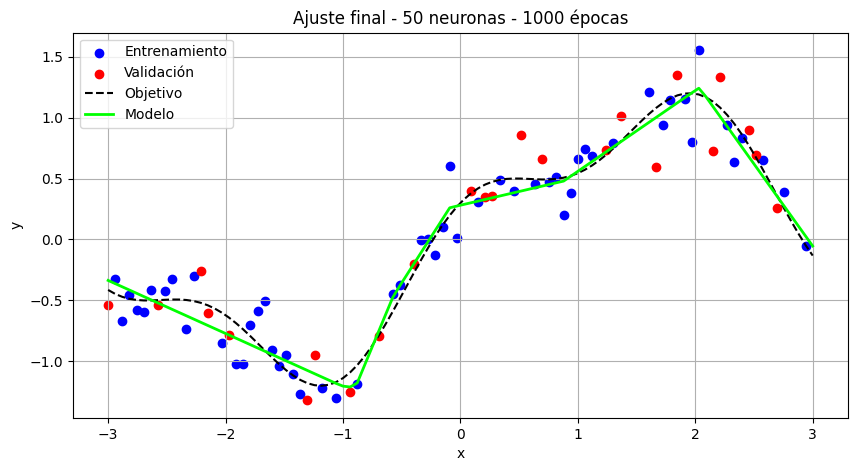

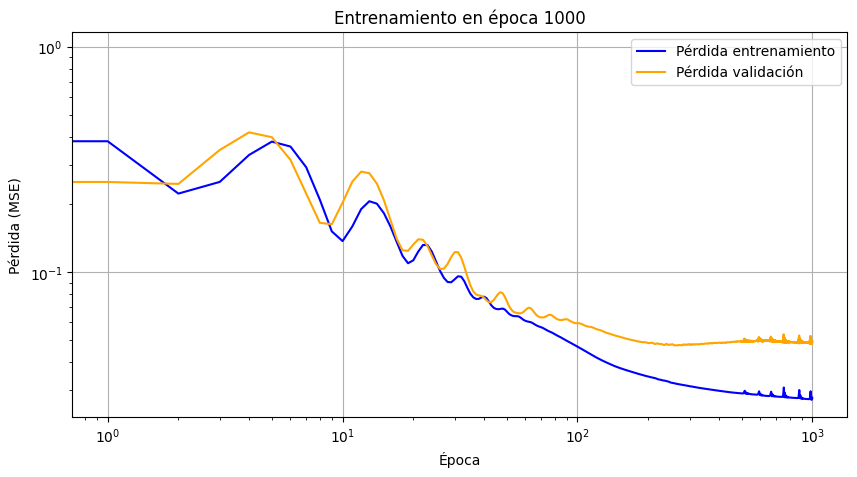

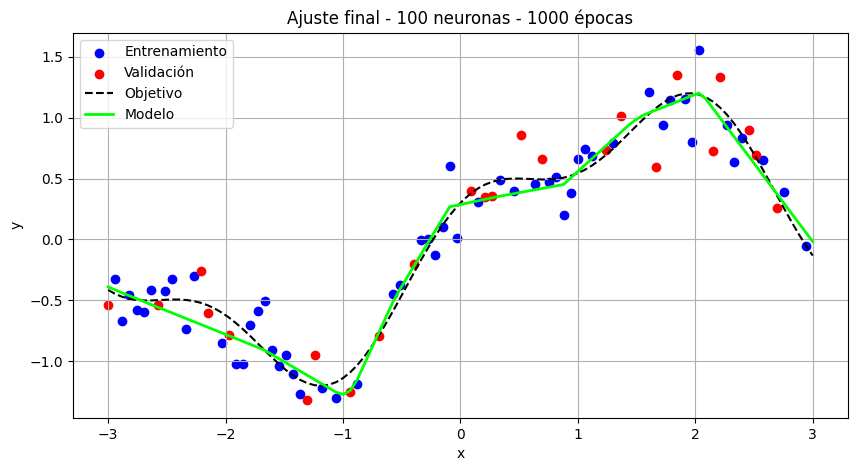

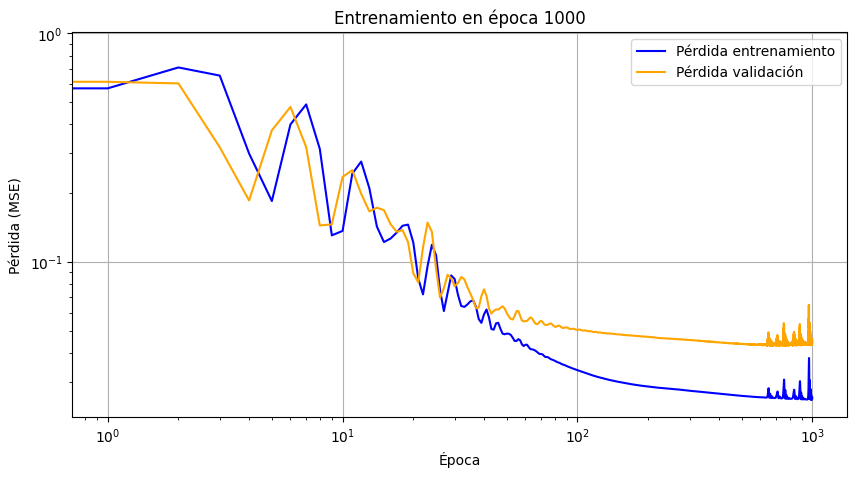

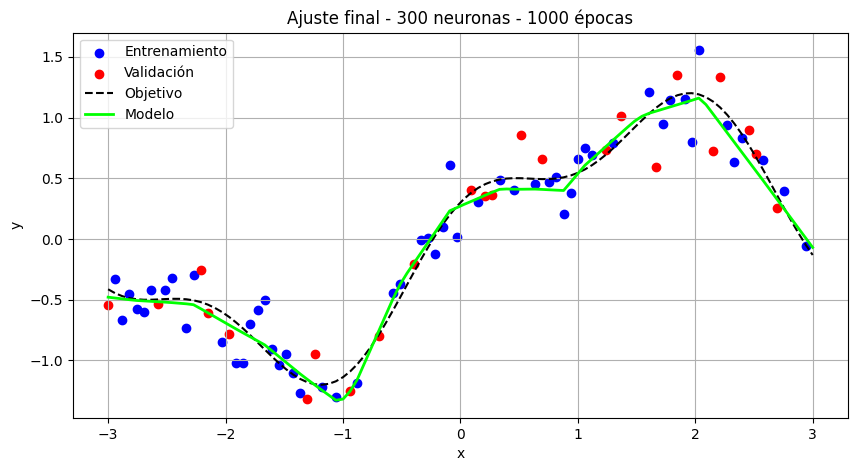

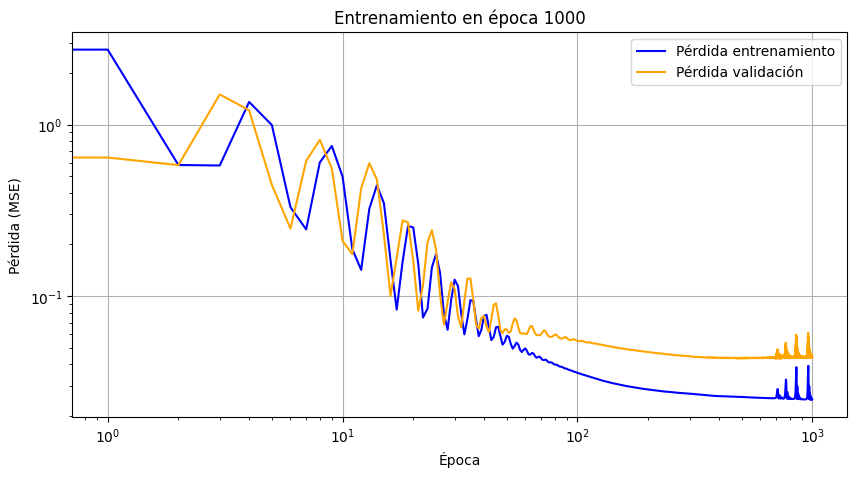

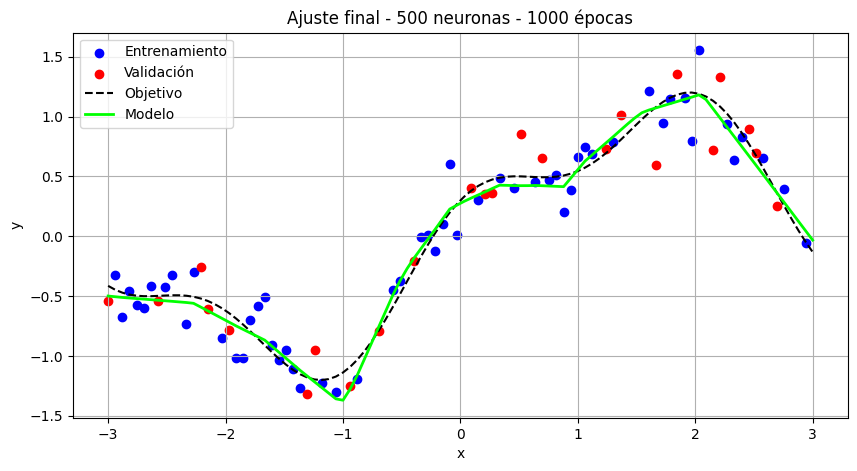

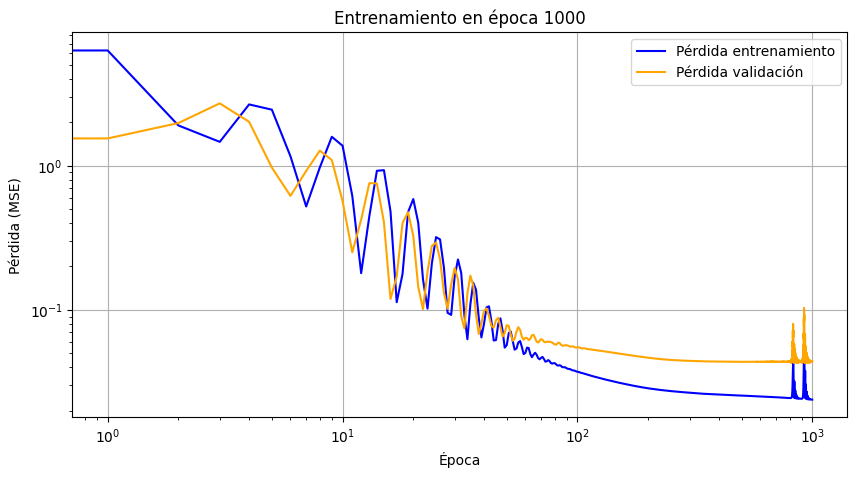

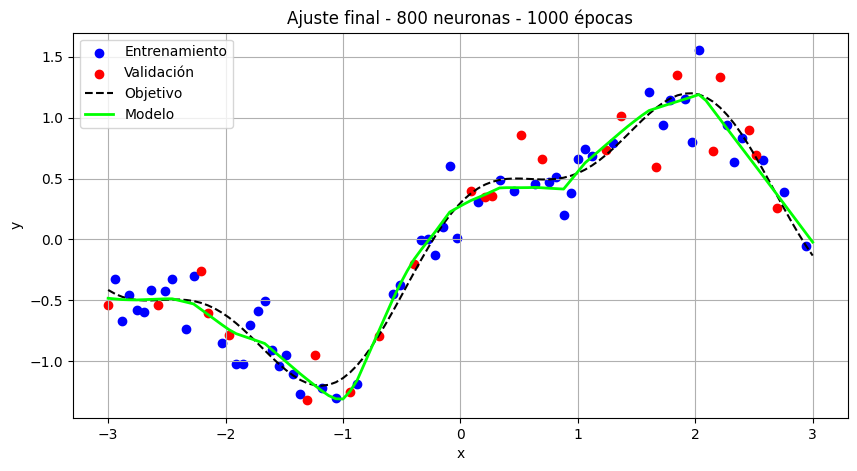

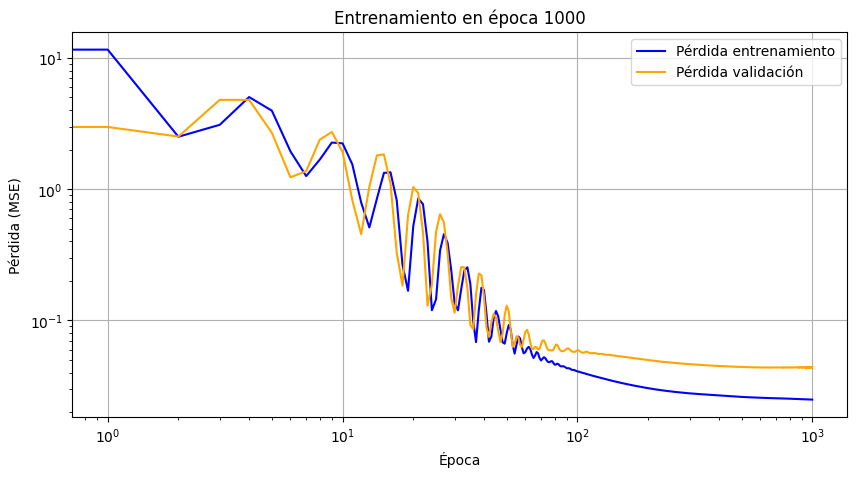

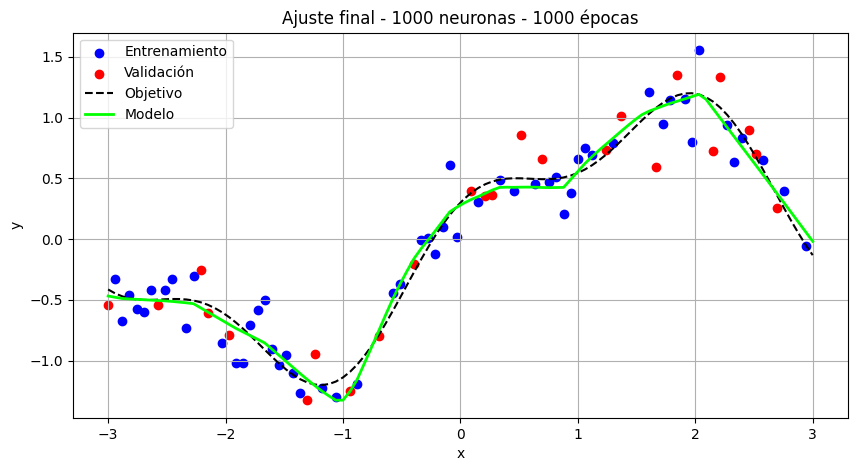

In [5]:
neuronas_lista = [20, 50, 100, 300, 500, 800, 1000]
epocas_neu_var = 1000
datos_neu_var = 100

# Generar datos sintéticos con ruido
x_datos_neu_var = np.linspace(-3, 3, datos_neu_var)
y_datos_neu_var = funcion_objetivo(x_datos_neu_var) + np.random.normal(scale=0.2, size=x_datos_neu_var.shape)

# División en conjuntos de entrenamiento (80%) y testeo (20%)
x_train_all_neu_var, x_test_neu_var, y_train_all_neu_var, y_test_neu_var = train_test_split(x_datos_neu_var, y_datos_neu_var, test_size=0.2, random_state=seed_lauti)

# División en conjuntos de entrenamiento (70%) y validación (30%)
x_train_neu_var, x_val_neu_var, y_train_neu_var, y_val_neu_var = train_test_split(x_train_all_neu_var, y_train_all_neu_var, test_size=0.3, random_state=seed_lauti)

# Conversión a tensores
x_train_t_neu_var = torch.tensor(x_train_neu_var, dtype=torch.float32).unsqueeze(1)
y_train_t_neu_var = torch.tensor(y_train_neu_var, dtype=torch.float32).unsqueeze(1)
x_val_t_neu_var = torch.tensor(x_val_neu_var, dtype=torch.float32).unsqueeze(1)
y_val_t_neu_var = torch.tensor(y_val_neu_var, dtype=torch.float32).unsqueeze(1)

# Graficar los conjuntos generados
plt.figure(figsize=(10, 5))
plt.scatter(x_train_neu_var, y_train_neu_var, label='Entrenamiento')
plt.scatter(x_val_neu_var, y_val_neu_var, label='Validación')
plt.plot(x_datos_neu_var, funcion_objetivo(x_datos_neu_var), 'k--', label='Función objetivo')
plt.xlabel('x')
plt.ylabel('y')
plt.title(rf'Conjuntos de Entrenamiento y Validación {datos_neu_var} datos')
plt.grid()
plt.legend()
plt.show()


for n_neuronas in neuronas_lista:
    
    # Crear y entrenar el modelo
    modelo_neu_var = RedSuperficial(n_neuronas=n_neuronas)
    entrenar_y_graficar(modelo_neu_var, x_train_t_neu_var, y_train_t_neu_var, x_val_t_neu_var, y_val_t_neu_var, epocas=epocas_neu_var)

    # Evaluación final del modelo entrenado
    modelo_neu_var.eval()
    with torch.no_grad():
        pred_neu_var = modelo_neu_var(torch.tensor(x_datos_neu_var, dtype=torch.float32).unsqueeze(1)).numpy()

    # Gráfico del ajuste visual
    plt.figure(figsize=(10, 5))
    plt.scatter(x_train_neu_var, y_train_neu_var, label='Entrenamiento', color = 'b')
    plt.scatter(x_val_neu_var, y_val_neu_var, label='Validación', color = 'r')
    plt.plot(x_datos_neu_var, funcion_objetivo(x_datos_neu_var), 'k--', label='Objetivo')
    plt.plot(x_datos_neu_var, pred_neu_var, linewidth=2, color = 'lime', label='Modelo')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.title(f'Ajuste final - {n_neuronas} neuronas - 1000 épocas')
    plt.legend()
    plt.show()

Cuando analizamos los graficos se pueden sacar varias conclusiones interesantes. En primer lugar, es claro que el hecho de tener pocas neuronas hace que la red no tenga la capcidad de aprender una funcion compleja como es la funcion objetivo. Sin embargo visualmente tambien se ve que a partir de 500 neuronas no se logra ver una mejoria significativa en el ajuste. 

Por otro lado, viendo las loss, vemos que en todos los casos, el hecho de hacer 1000 epocas produjo cierto sobreajuste porque en todos los casos, la disminucion de la loss de los datos de entrenamiento empezo a mejorar a costa de la loss de validacion. En conclusion, aumentar el numero de neuronas tiene sentido hasta cierto punto, donde despues de eso es un gasto computacional innecessario dado que ni la loss muestra una mejoria entre las 500 y 1000 neuronas.

## Análisis de variacion del número de datos
Fijar el número de épocas en 1000 y el número de neuronas en 200. Generar datos variando el número de puntos de 20 a 1000 (incrementando en 20, 100, 500, 1000). Entrenar y graficar el modelo con una sola capa utilizando los diferentes conjuntos de datos. Observar cómo varía el ajuste y las curvas de pérdida en función del número de datos.


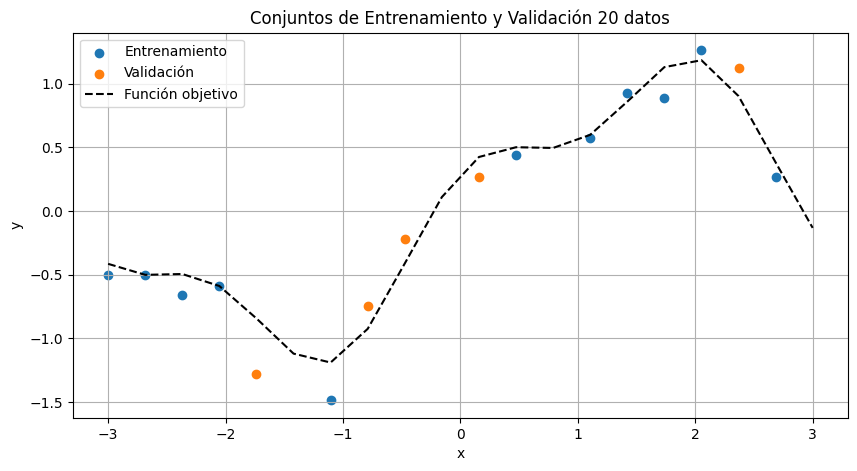

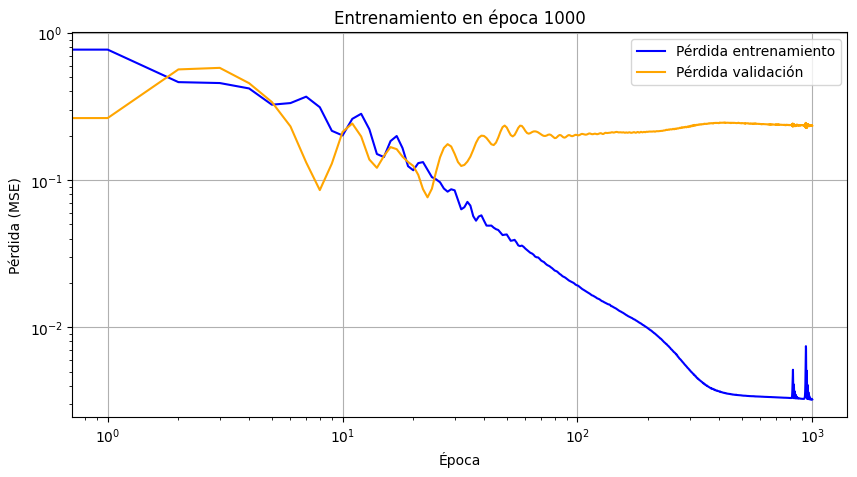

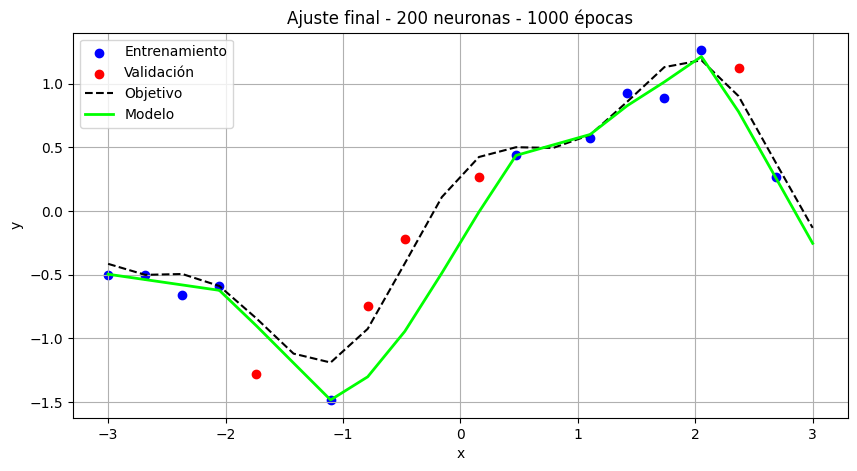

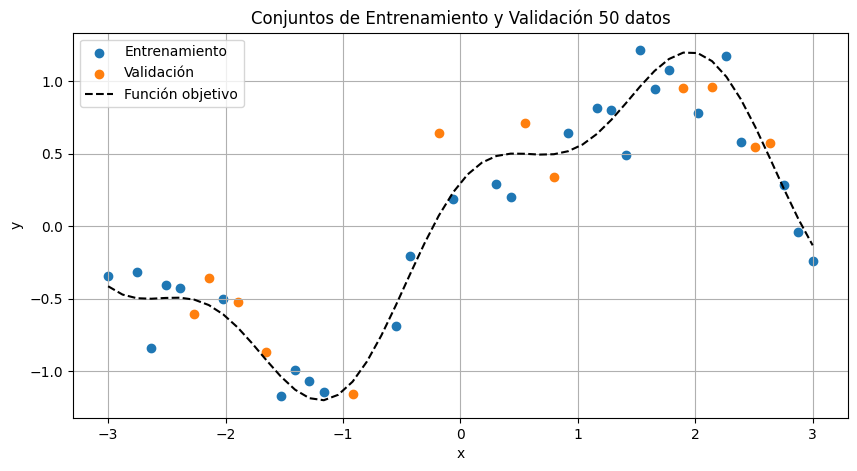

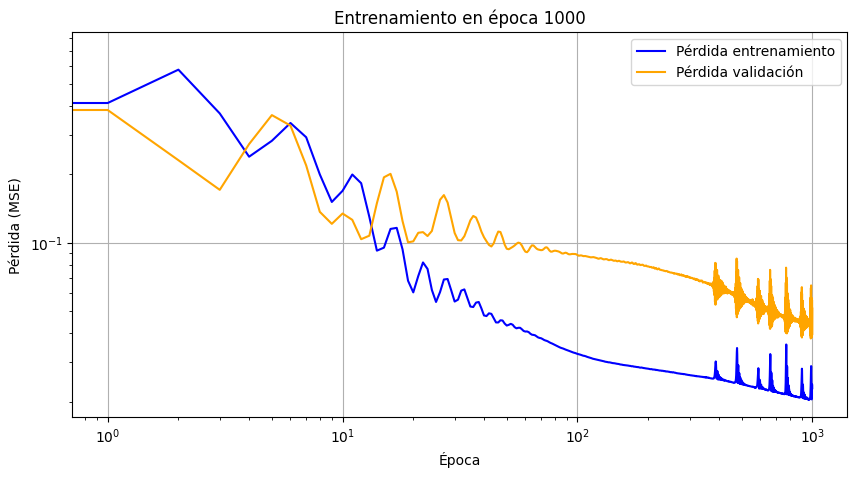

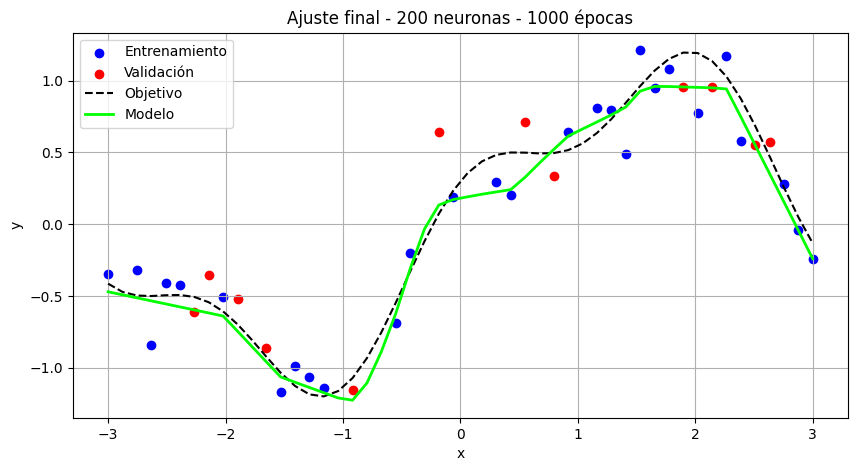

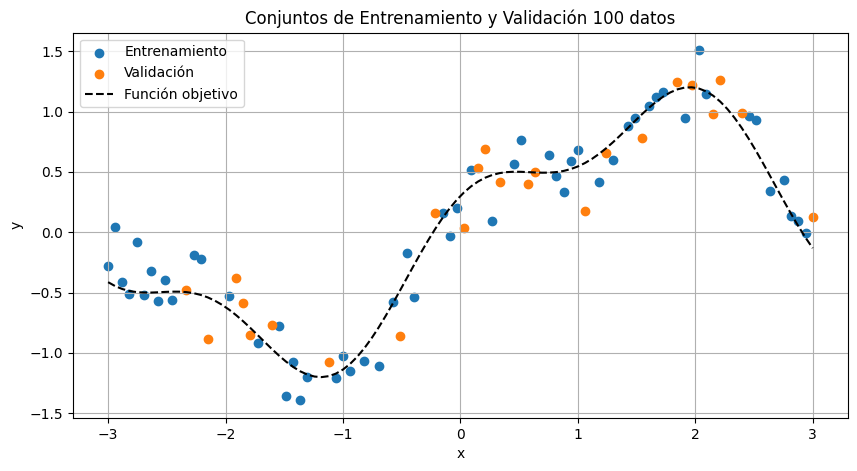

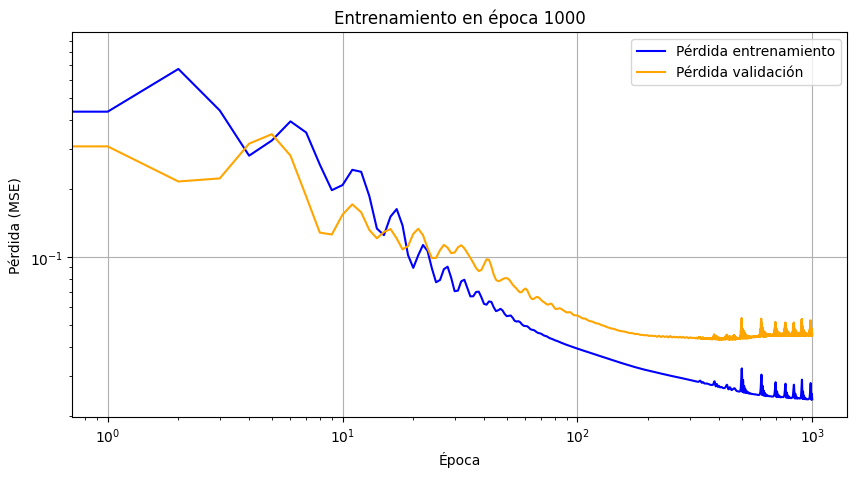

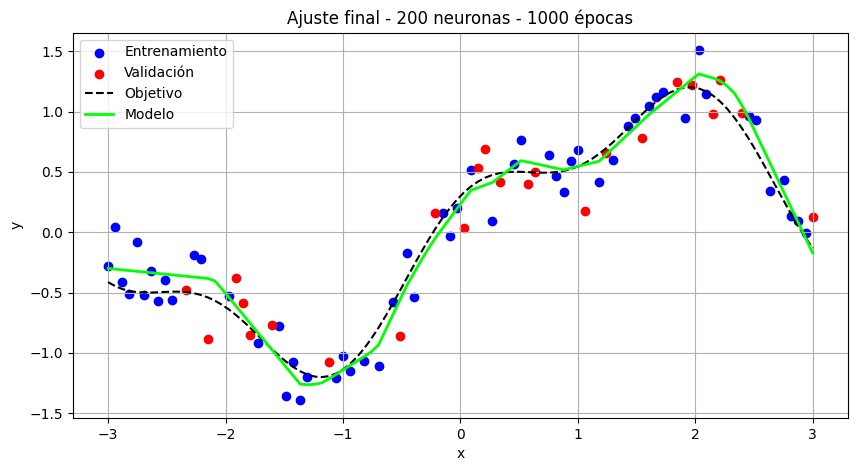

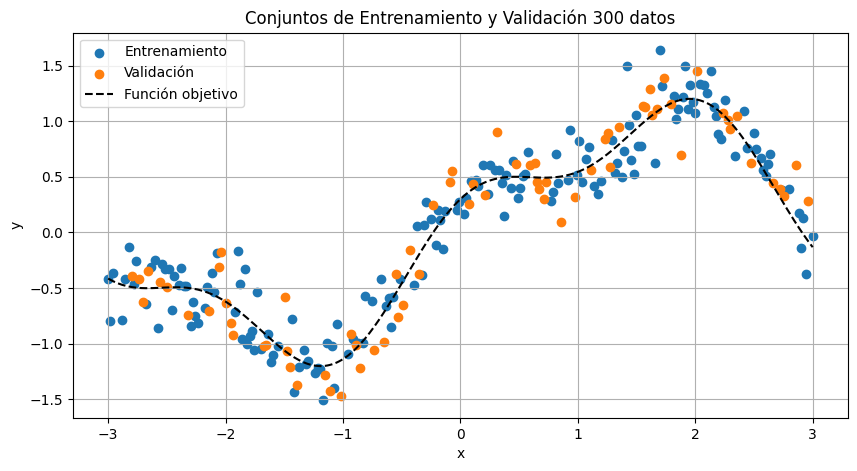

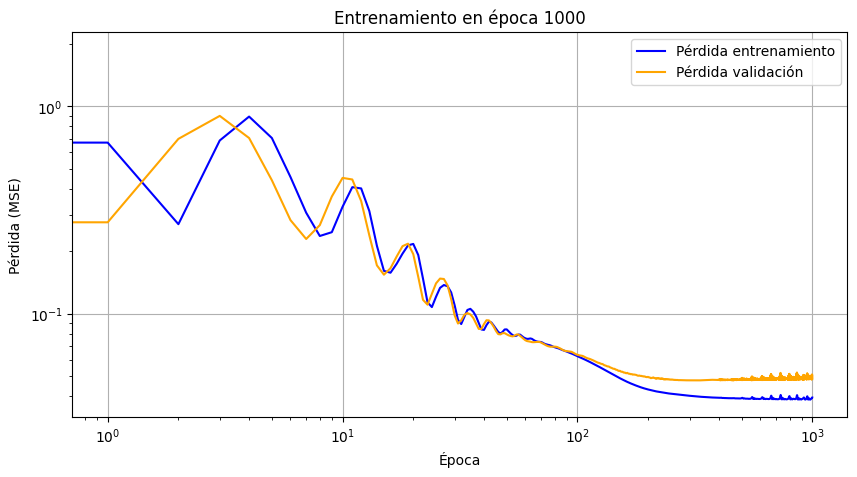

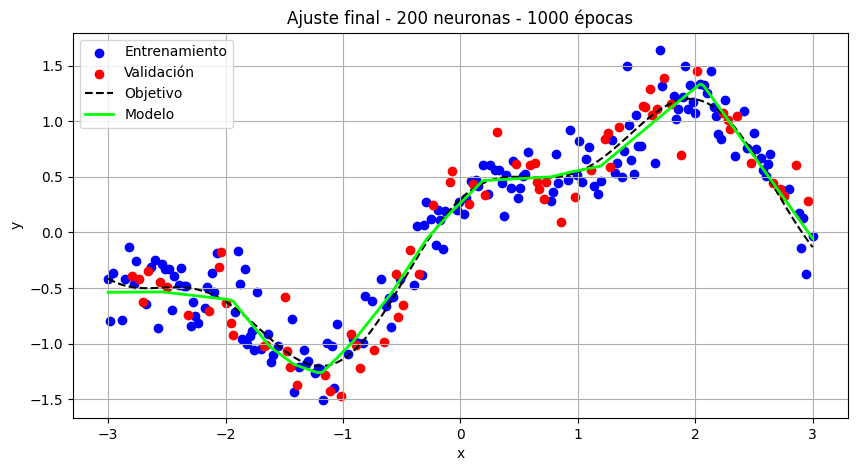

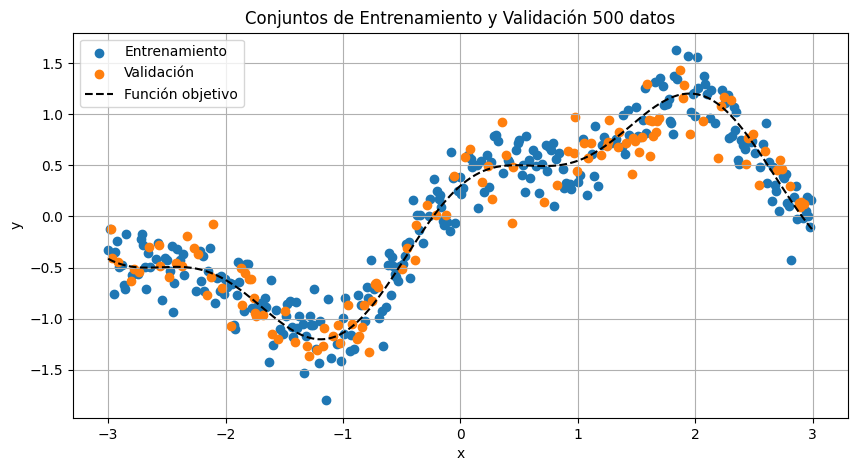

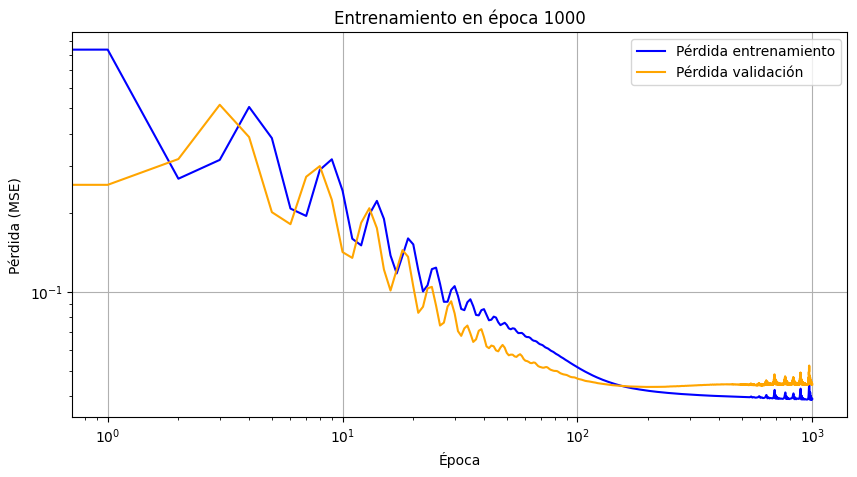

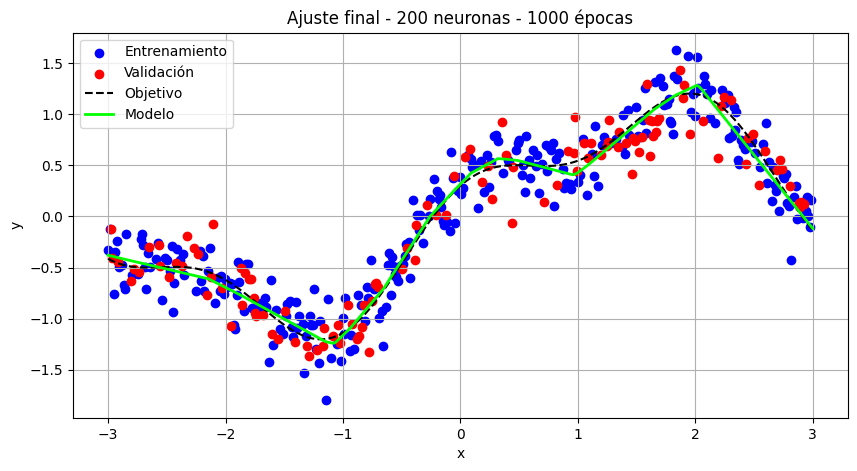

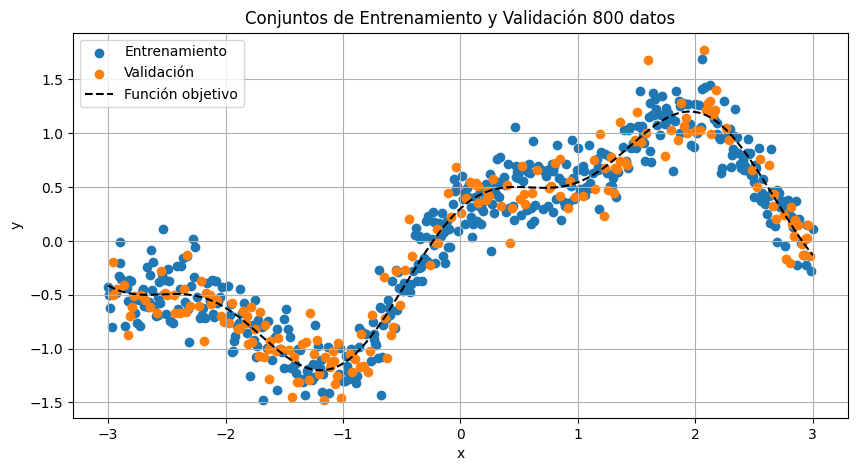

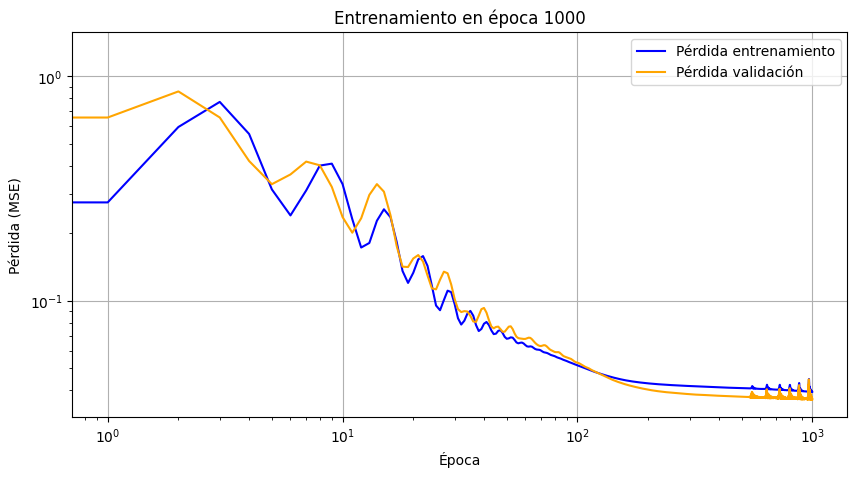

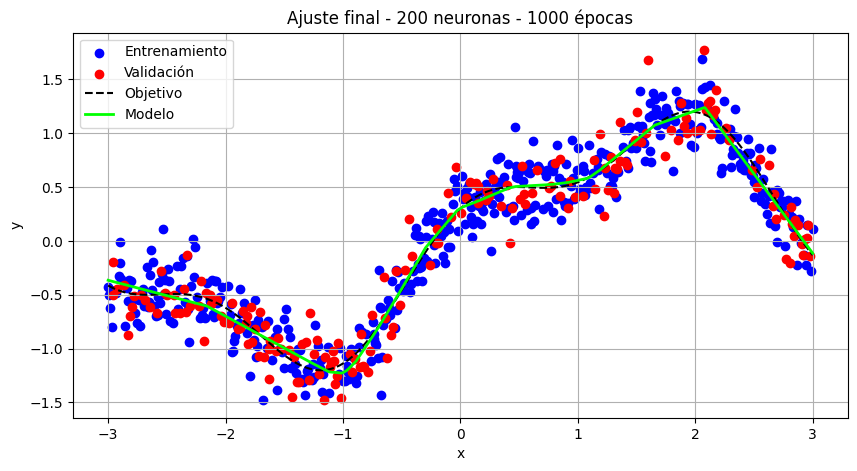

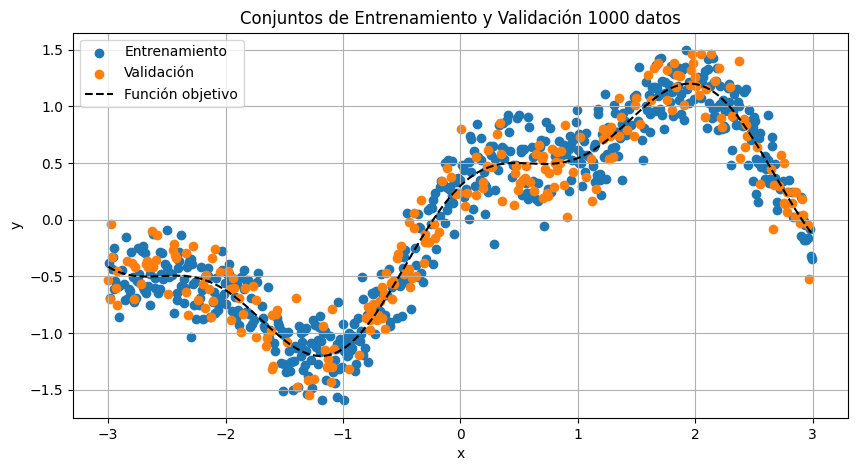

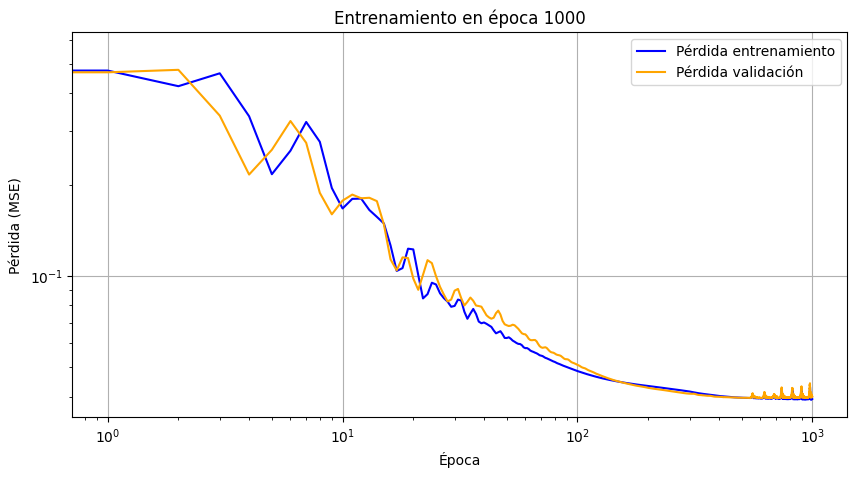

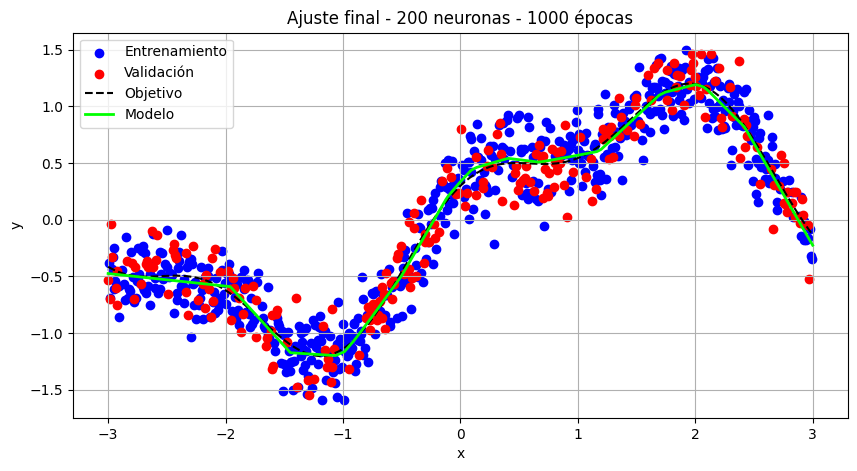

In [6]:
datos_lista = [20, 50, 100, 300, 500, 800, 1000]
n_neuronas_dat_var = 200
epocas_dat_var = 1000

for datos in datos_lista:

    # Generar datos sintéticos con ruido
    x_datos_dat_var = np.linspace(-3, 3, datos)
    y_datos_dat_var = funcion_objetivo(x_datos_dat_var) + np.random.normal(scale=0.2, size=x_datos_dat_var.shape)

    # División en conjuntos de entrenamiento (80%) y testeo (20%)
    x_train_all_dat_var, x_test_dat_var, y_train_all_dat_var, y_test_dat_var = train_test_split(x_datos_dat_var, y_datos_dat_var, test_size=0.2, random_state=seed_lauti)

    # División en conjuntos de entrenamiento (70%) y validación (30%)
    x_train_dat_var, x_val_dat_var, y_train_dat_var, y_val_dat_var = train_test_split(x_train_all_dat_var, y_train_all_dat_var, test_size=0.3, random_state=seed_lauti)

    # Conversión a tensores
    x_train_t_dat_var = torch.tensor(x_train_dat_var, dtype=torch.float32).unsqueeze(1)
    y_train_t_dat_var = torch.tensor(y_train_dat_var, dtype=torch.float32).unsqueeze(1)
    x_val_t_dat_var = torch.tensor(x_val_dat_var, dtype=torch.float32).unsqueeze(1)
    y_val_t_dat_var = torch.tensor(y_val_dat_var, dtype=torch.float32).unsqueeze(1)

    # Graficar los conjuntos generados
    plt.figure(figsize=(10, 5))
    plt.scatter(x_train_dat_var, y_train_dat_var, label='Entrenamiento')
    plt.scatter(x_val_dat_var, y_val_dat_var, label='Validación')
    plt.plot(x_datos_dat_var, funcion_objetivo(x_datos_dat_var), 'k--', label='Función objetivo')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(rf'Conjuntos de Entrenamiento y Validación {datos} datos')
    plt.grid()
    plt.legend()
    plt.show()
    
    # Crear y entrenar el modelo
    modelo_dat_var = RedSuperficial(n_neuronas=n_neuronas_dat_var)
    entrenar_y_graficar(modelo_dat_var, x_train_t_dat_var, y_train_t_dat_var, x_val_t_dat_var, y_val_t_dat_var, epocas=epocas_dat_var)

    # Evaluación final del modelo entrenado
    modelo_dat_var.eval()
    with torch.no_grad():
        pred_dat_var = modelo_dat_var(torch.tensor(x_datos_dat_var, dtype=torch.float32).unsqueeze(1)).numpy()

    # Gráfico del ajuste visual
    plt.figure(figsize=(10, 5))
    plt.scatter(x_train_dat_var, y_train_dat_var, label='Entrenamiento', color = 'b')
    plt.scatter(x_val_dat_var, y_val_dat_var, label='Validación', color = 'r')
    plt.plot(x_datos_dat_var, funcion_objetivo(x_datos_dat_var), 'k--', label='Objetivo')
    plt.plot(x_datos_dat_var, pred_dat_var, linewidth=2, color = 'lime', label='Modelo')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.title(f'Ajuste final - {n_neuronas_dat_var} neuronas - 1000 épocas')
    plt.legend()
    plt.show()

Cuando analizamos los graficos se pueden sacar varias conclusiones interesantes aqui tambien, pero que creo que son aun mas relevantes. Lo primero que hay que decir que creo que es lo mas obvio pero lo mas relevante es que aumentar mucho el numero de datos es de las mejores cosas que se le puede hacer al modelo. Esto se puede ver facilmente en los ajuste donde se ve el ajuste es casi identico a la funcion objetivo con muchos datos.

Por otro lado, analizando las loss, vemos, en primer lugar el tener pocos datos produce un ajuste malo (lo que era predecible) dado que la diferencia entre las loss de validacion y entrenamiento es enorme. En segundo lugar, a diferencia de para cuando variamos las neuronas, no se observo a medida que aumentasen mucho los datos la diferencia de las loss fuese grande. En lo contrario, la diferencia para 1000 datos entre las funciones fue infima. Sin embargo este efecto solo se observo para volumenes de datos muy grandes, 800 y 1000, lo que es inherentemente computacionalmente intensivo.

## Analisis de variacion de corte de Epocas
Fijar el número de neuronas en 400 y el número de datos en 200. Entrenar y graficar el modelo con una sola capa variando la epoca en la que se corta en modelo (inicialmente cortando a 1000 epocas y analizando a mano a partir de ahi -> los primeros numeors son a ojo). Analizar los resultados en términos de ajuste visual y curvas de pérdida para identificar subajuste y sobreajuste.

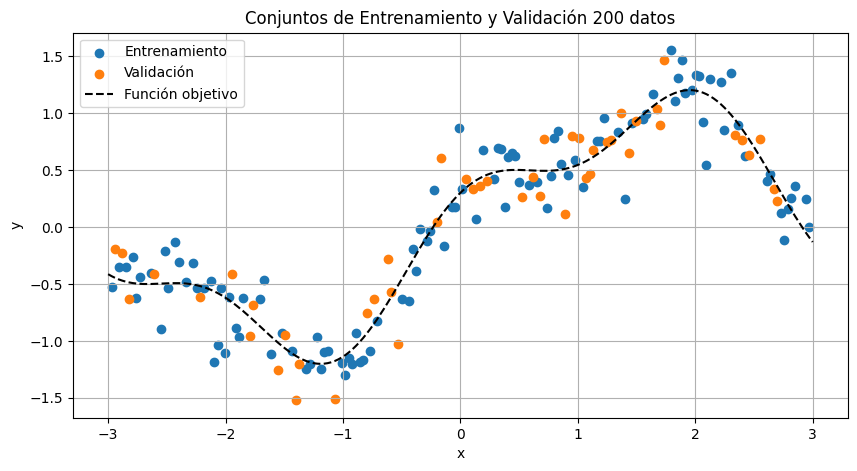

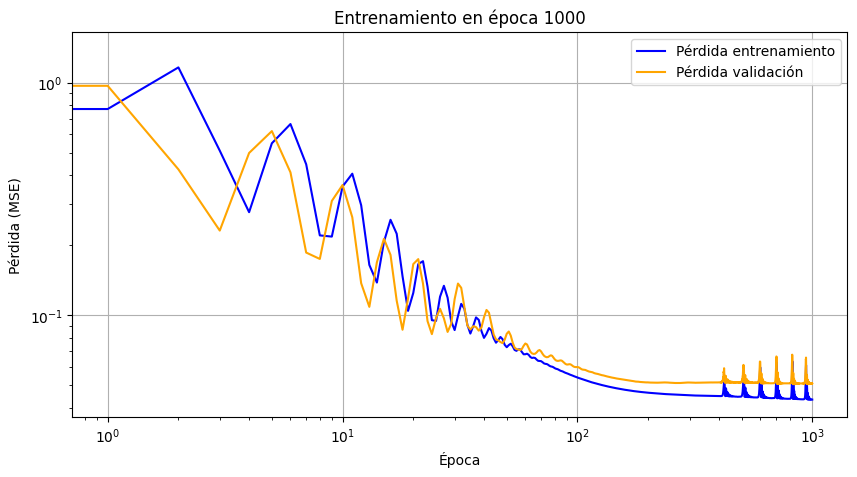

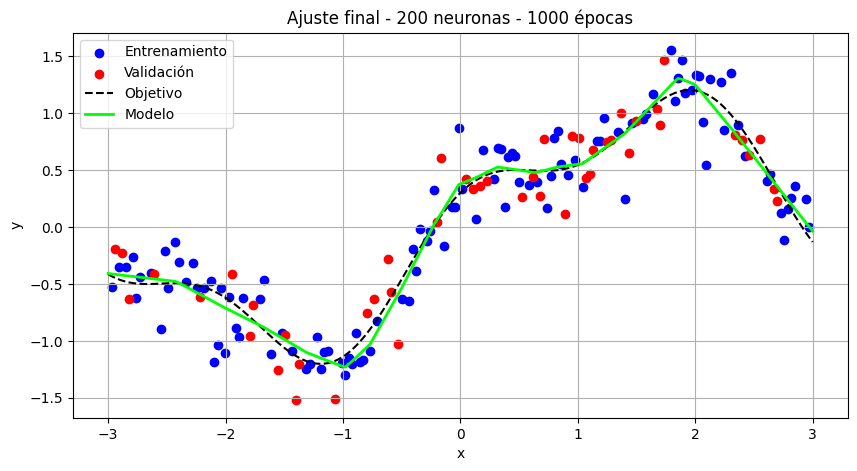

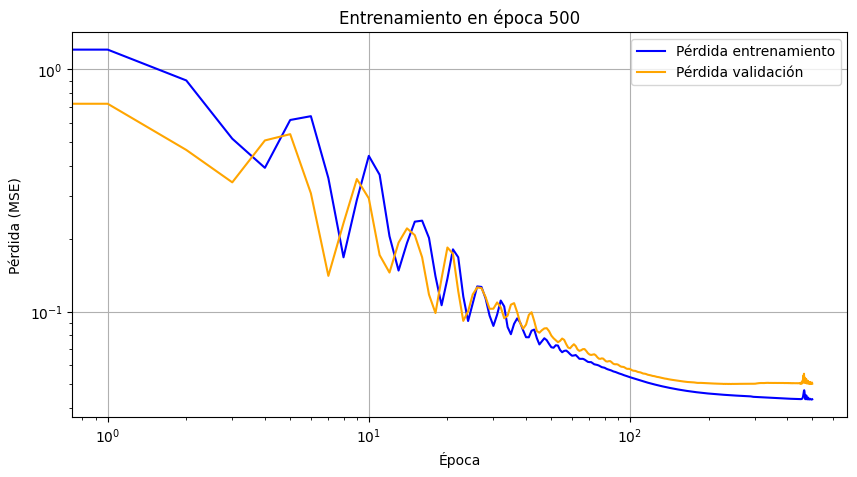

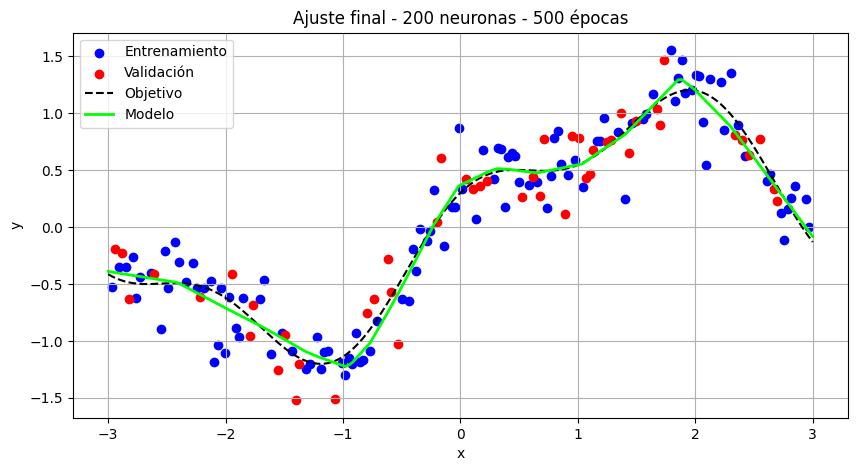

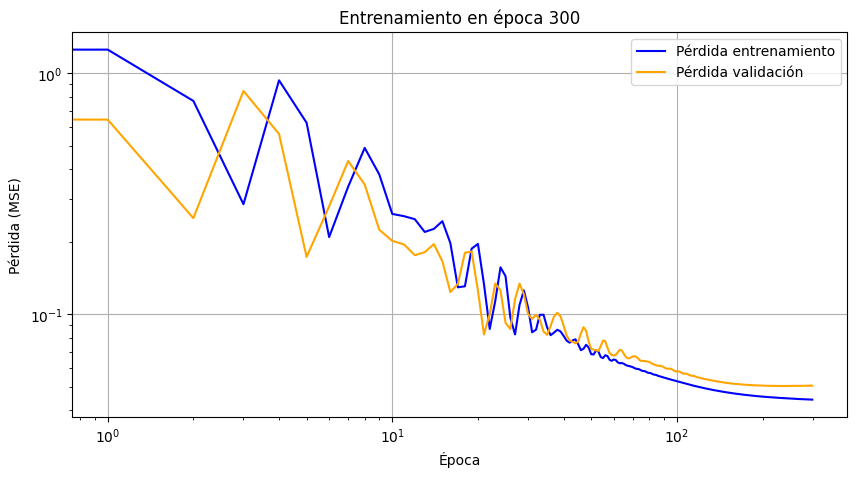

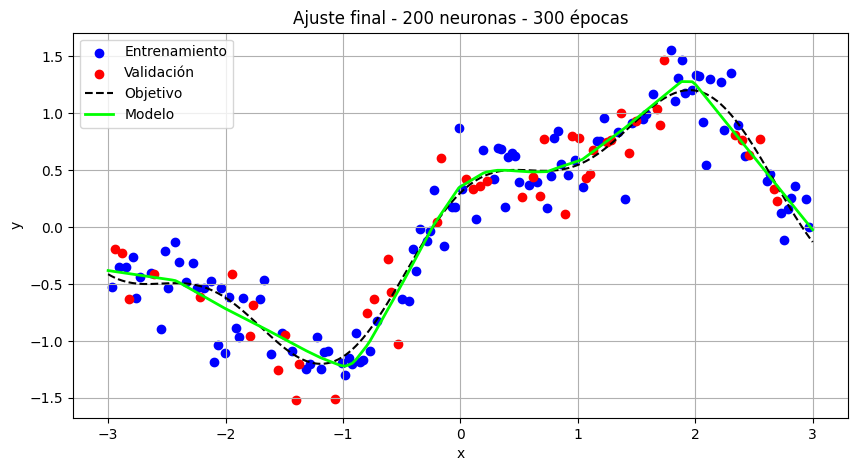

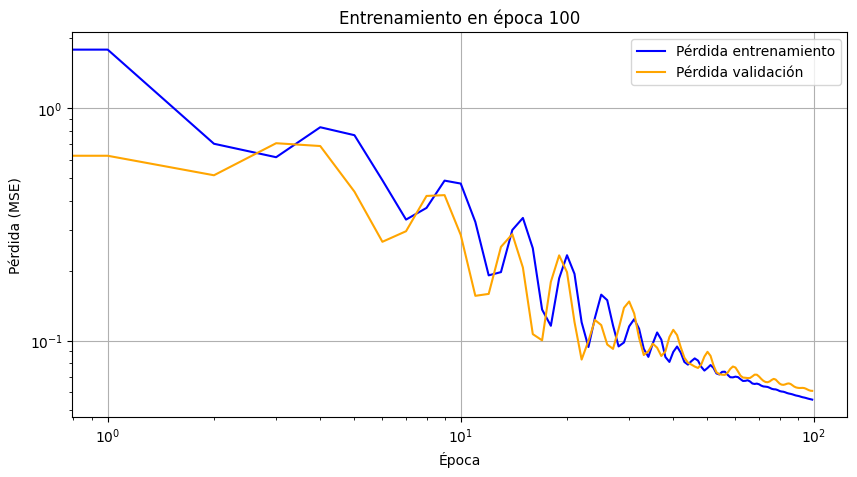

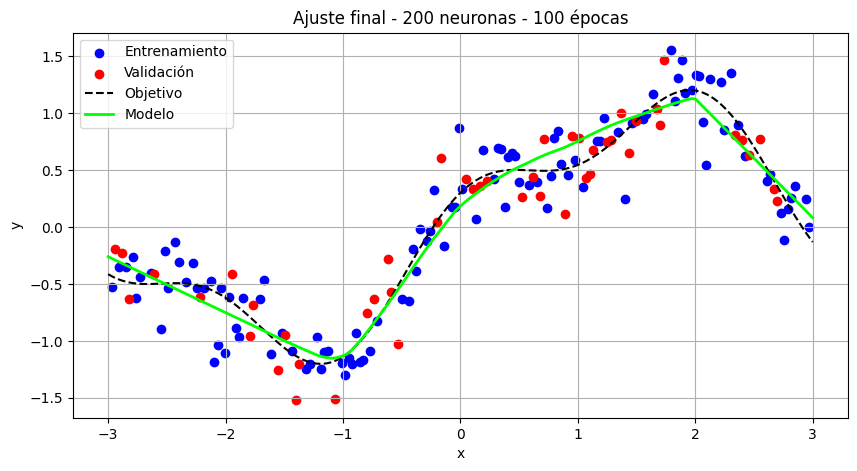

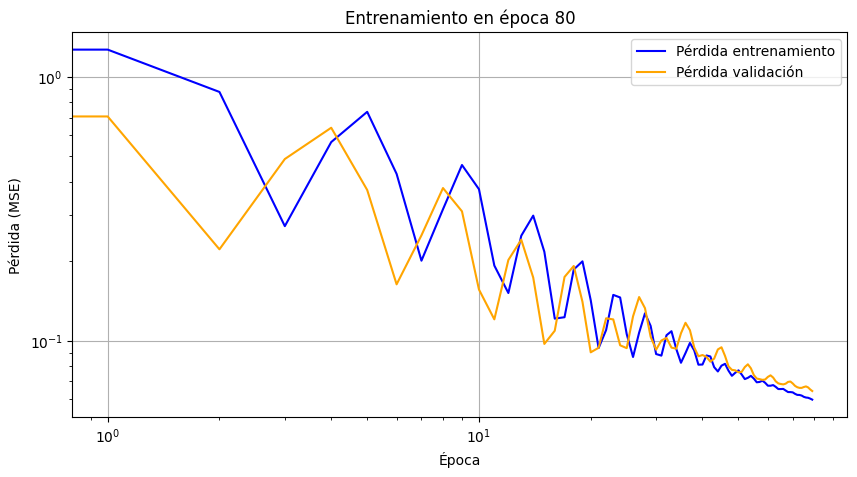

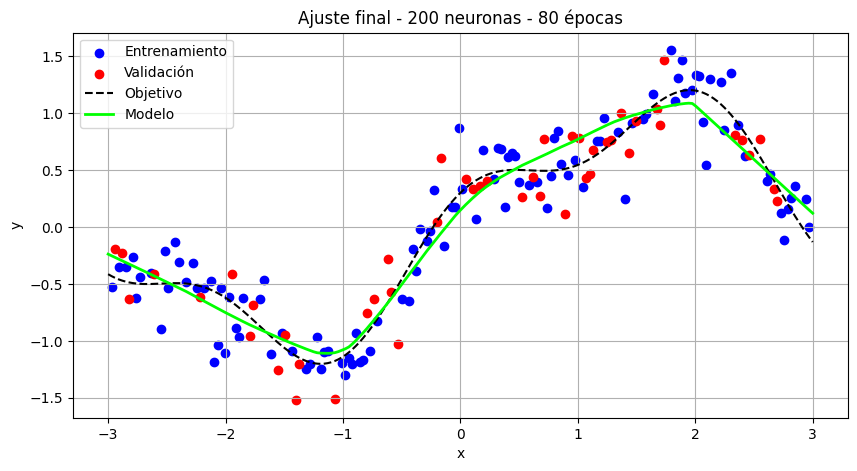

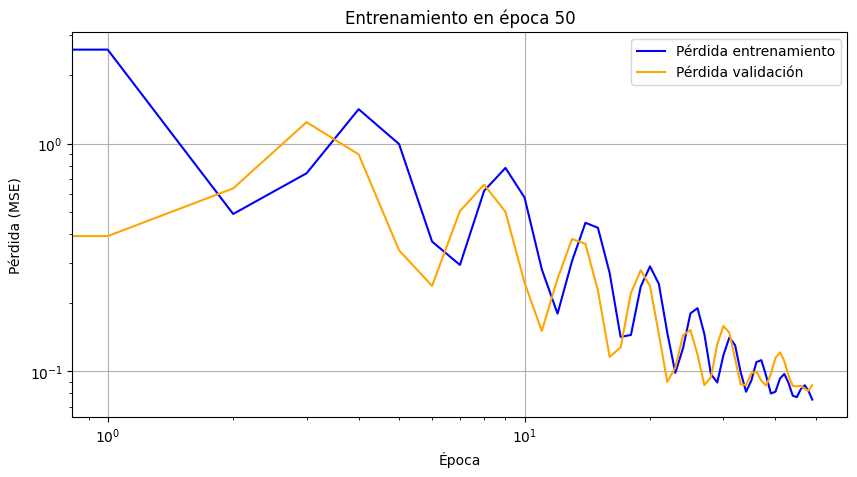

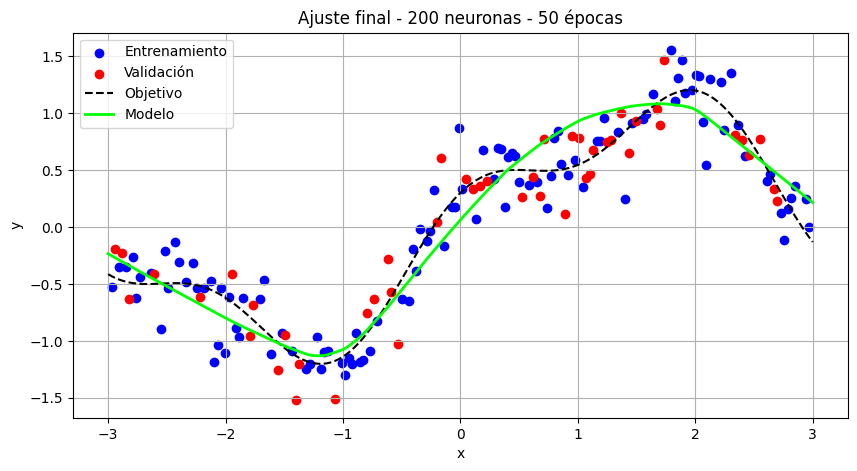

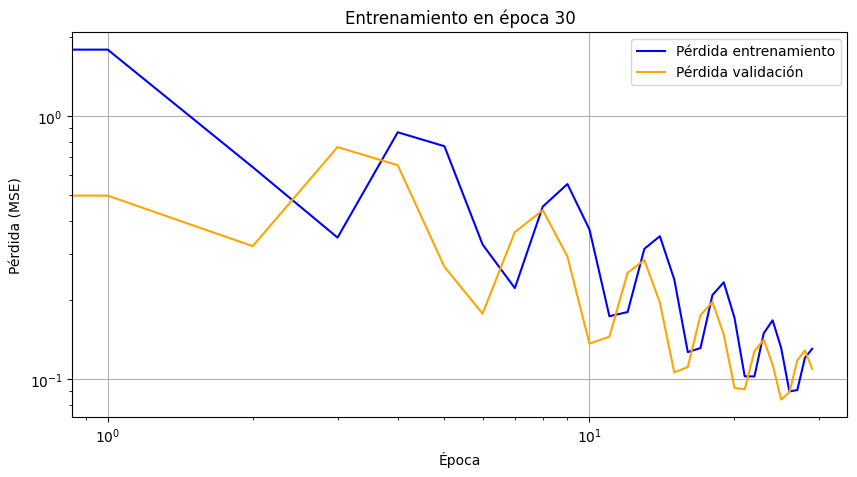

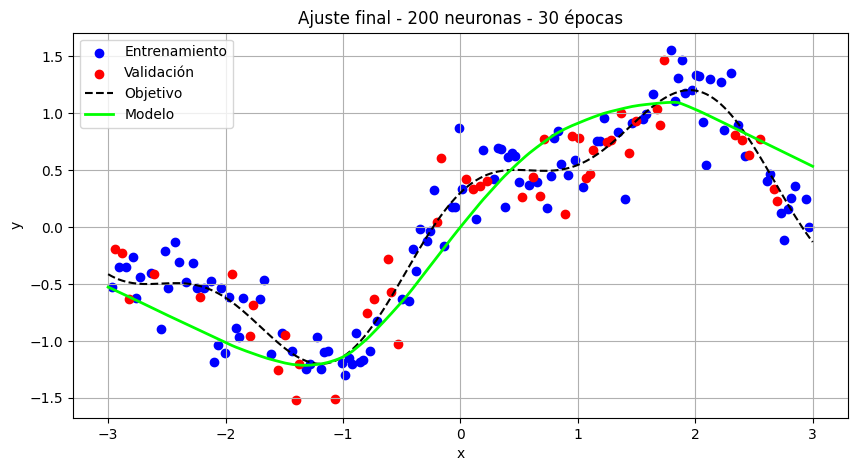

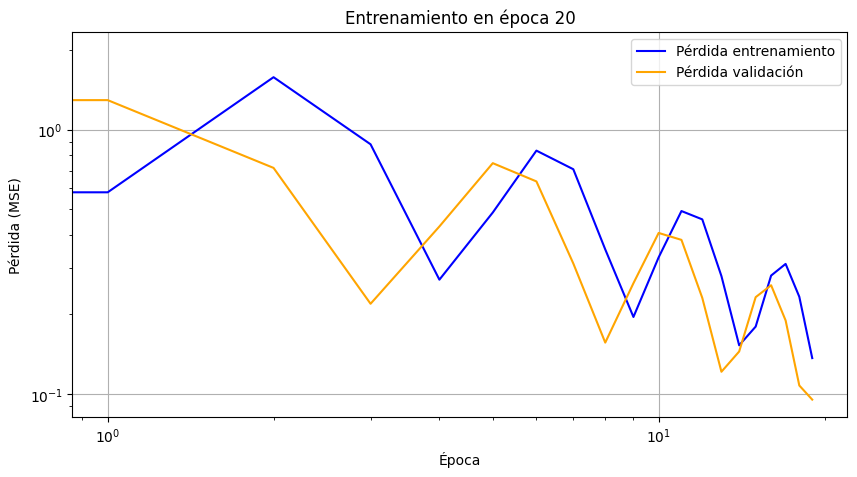

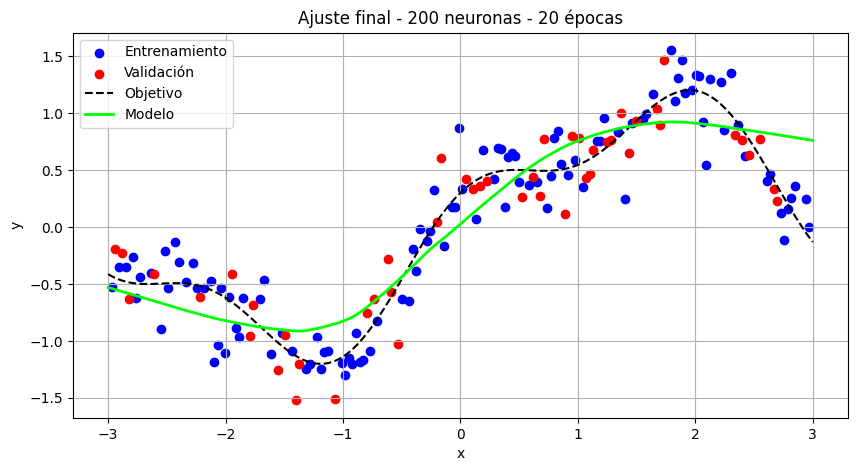

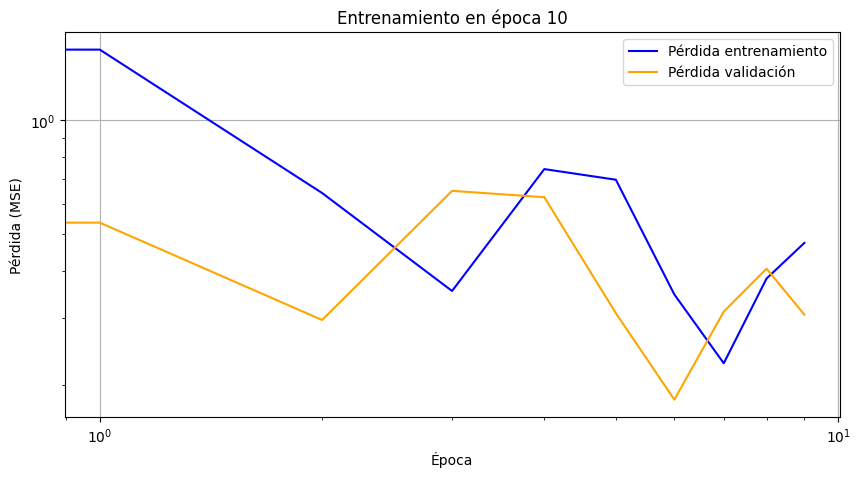

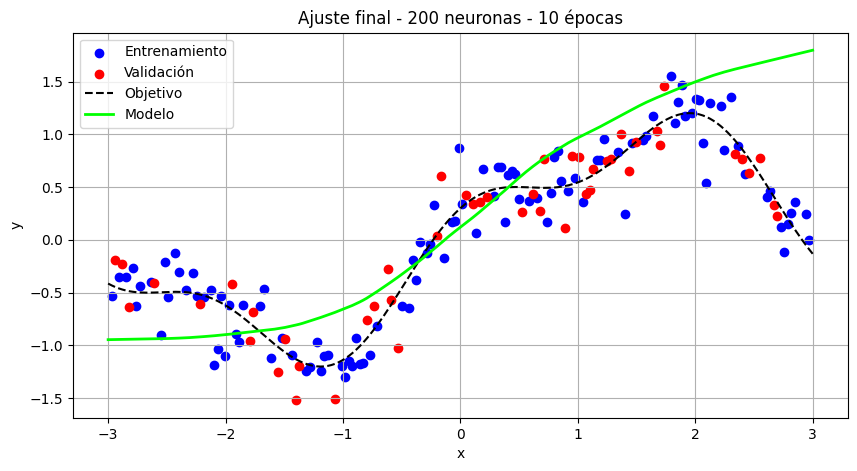

In [7]:
epocas_lista = [1000, 500, 300, 100, 80, 50, 30, 20, 10]
n_neuronas_epoc_var = 400
datos_epoc_var = 200

# Generar datos sintéticos con ruido
x_datos_epoc_var = np.linspace(-3, 3, datos_epoc_var)
y_datos_epoc_var = funcion_objetivo(x_datos_epoc_var) + np.random.normal(scale=0.2, size=x_datos_epoc_var.shape)

# División en conjuntos de entrenamiento (80%) y testeo (20%)
x_train_all_epoc_var, x_test_epoc_var, y_train_all_epoc_var, y_test_epoc_var = train_test_split(x_datos_epoc_var, y_datos_epoc_var, test_size=0.2, random_state=seed_lauti)

# División en conjuntos de entrenamiento (70%) y validación (30%)
x_train_epoc_var, x_val_epoc_var, y_train_epoc_var, y_val_epoc_var = train_test_split(x_train_all_epoc_var, y_train_all_epoc_var, test_size=0.3, random_state=seed_lauti)

# Conversión a tensores
x_train_t_epoc_var = torch.tensor(x_train_epoc_var, dtype=torch.float32).unsqueeze(1)
y_train_t_epoc_var = torch.tensor(y_train_epoc_var, dtype=torch.float32).unsqueeze(1)
x_val_t_epoc_var = torch.tensor(x_val_epoc_var, dtype=torch.float32).unsqueeze(1)
y_val_t_epoc_var = torch.tensor(y_val_epoc_var, dtype=torch.float32).unsqueeze(1)

# Graficar los conjuntos generados
plt.figure(figsize=(10, 5))
plt.scatter(x_train_epoc_var, y_train_epoc_var, label='Entrenamiento')
plt.scatter(x_val_epoc_var, y_val_epoc_var, label='Validación')
plt.plot(x_datos_epoc_var, funcion_objetivo(x_datos_epoc_var), 'k--', label='Función objetivo')
plt.xlabel('x')
plt.ylabel('y')
plt.title(rf'Conjuntos de Entrenamiento y Validación {datos_epoc_var} datos')
plt.grid()
plt.legend()
plt.show()

for epoca in epocas_lista:

    # Crear y entrenar el modelo
    modelo_epoc_var = RedSuperficial(n_neuronas=n_neuronas_epoc_var)
    entrenar_y_graficar(modelo_epoc_var, x_train_t_epoc_var, y_train_t_epoc_var, x_val_t_epoc_var, y_val_t_epoc_var, epocas=epoca)

    # Evaluación final del modelo entrenado
    modelo_epoc_var.eval()
    with torch.no_grad():
        pred_epoc_var = modelo_epoc_var(torch.tensor(x_datos_epoc_var, dtype=torch.float32).unsqueeze(1)).numpy()

    # Gráfico del ajuste visual
    plt.figure(figsize=(10, 5))
    plt.scatter(x_train_epoc_var, y_train_epoc_var, label='Entrenamiento', color = 'b')
    plt.scatter(x_val_epoc_var, y_val_epoc_var, label='Validación', color = 'r')
    plt.plot(x_datos_epoc_var, funcion_objetivo(x_datos_epoc_var), 'k--', label='Objetivo')
    plt.plot(x_datos_epoc_var, pred_epoc_var, linewidth=2, color = 'lime', label='Modelo')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.title(f'Ajuste final - 200 neuronas - {epoca} épocas')
    plt.legend()
    plt.show()

Cuando analizamos los graficos se pueden sacar varias conclusiones interesantes aqui apoyando una de las hipotesis del analisis del principio respecto a las epocas. Lo primero que se ve inicialmente, lo cual es super relevante, no hay una mejoria en el ajuste, ni tampoco en la loss al pasar de 300 a 1000 epocas. Es mas, cuando se observa la loss, empeora el modelo al llegar a las 1000 epocas donde la loss de los datos de validacion, no solo deja de mejorar sino que directamente empeora.

Por otro lado vemos lo que era de esperarse tambien, que al disminuir mucho las epocas, no le damos tiempo a la red a aprenderse las cosas mas sutiles o complejas de la funcion objetivo. Si analizamos los valores de epocas de 300 para abajo vemos que los detalles del ajuste se empiezan a perder y solo (viendo la de solo 10 epocas) solo aprende el comportamiento general de la funcion que empieza desde abajo y termina arriba pasando por aproximadamente el (0,0).